# Load in counts table & name samples

In [1]:
a<-read.csv('SamplesViewReportCLIO_AE1913merged_trans210506_updated220606exclusive.csv',header=T, stringsAsFactors=F) #exclusive spectral counts

In [2]:
rownames(a)<-a$Name #for TPM_table.tab and table.tab and exclusive counts
a<-a[,-1]

In [3]:
a <- a[,colSums(is.na(a))<nrow(a)] #Remove added columns with empty values
a[is.na(a)] <- 0 #for proteins

In [4]:
#Remove X from colnames
colnames(a)<-sub("X", "", colnames(a))

In [5]:
cts1<-a

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
cts1$X<-rownames(cts1)

# spectral count normalization

In [8]:
length<-read.table('cds.length2.tab',header=F,sep=' ',stringsAsFactors=F) #ORF length in bp

In [9]:
colnames(length)<-c('X','length')

In [10]:
join<-merge(length, cts1, by='X',all=F) #join with ORF length

In [11]:
#NSAF normalized counts
join[is.na(join)] <- 0
join[,3:88]<-lapply(join[,3:88],as.numeric)
x <- join[3:88] / (join$length/3) #convert nucleotide bp to AA bp
nsaf <- t( t(x) * 1e3 / colSums(x) )
nsaf1<-as.data.frame(nsaf)
nsaf1$transcript_name<-join$X
cts1<-nsaf1

In [12]:
options(repr.matrix.max.cols=80, repr.matrix.max.rows=80)

# Load in annotation table 

In [13]:
library(caroline)
tax<-read.tab('merged.fasta.transdecoder-estimated-taxonomy.LCA.phyloDB.within3percent.AddRef.RefSeq.out') 

aa<-tax[order(tax$transcript_name, (tax$max_pid)), ] 
bb<-aa[ !duplicated(aa$transcript_name), ] #Remove duplicates

tax<-bb

rownames(tax)<-tax$transcript_name

library(stringr)
library(tidyr)
tax<- tax %>%
  separate(full_classification, c("domain","supergroup", "division","class","order","family","genus","species"), ";")

Warning message:
“Expected 8 pieces. Missing pieces filled with `NA` in 6887307 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [14]:
merge<-merge(cts1, tax, by='transcript_name') 
rownames(merge)<-merge$transcript_name

In [15]:
head(merge)

transcript_name              1_30_0.2   1_115_0.2 
megahit_HN001_k141_100053.p1 megahit_HN001_k141_100053.p1 0.00000000 0.00000000
megahit_HN001_k141_100230.p1 megahit_HN001_k141_100230.p1 0.00000000 0.00000000
megahit_HN001_k141_10061.p1  megahit_HN001_k141_10061.p1  0.07009058 0.00000000
megahit_HN001_k141_101601.p1 megahit_HN001_k141_101601.p1 0.00000000 0.00000000
megahit_HN001_k141_101642.p1 megahit_HN001_k141_101642.p1 0.15564807 0.05519042
megahit_HN001_k141_101719.p1 megahit_HN001_k141_101719.p1 0.00000000 0.00000000
                             1_30_3 1_115_3 1_150 1_200 1_300 1_400 1_600 1_800
megahit_HN001_k141_100053.p1 0      0       0     0     0     0     0     0    
megahit_HN001_k141_100230.p1 0      0       0     0     0     0     0     0    
megahit_HN001_k141_10061.p1  0      0       0     0     0     0     0     0    
megahit_HN001_k141_101601.p1 0      0       0     0     0     0     0     0    
megahit_HN001_k141_101642.p1 0      0       0     0     0     0     0     0    
megahit_HN001_k141_101719.p1 0      0       0     0     0     0     0     0    
                             1_20 1_175 1_250 1_350 2_20       2_60       2_90
megahit_HN001_k141_100053.p1 0    0     0     0     0.00000000 0.00000000 0   
megahit_HN001_k141_100230.p1 0    0     0     0     0.00000000 0.00000000 0   
megahit_HN001_k141_10061.p1  0    0     0     0     0.00000000 0.00000000 0   
megahit_HN001_k141_101601.p1 0    0     0     0     0.03623449 0.00000000 0   
megahit_HN001_k141_101642.p1 0    0     0     0     0.00000000 0.04770327 0   
megahit_HN001_k141_101719.p1 0    0     0     0     0.01671192 0.00000000 0   
                             2_120 2_150 2_800 2_200 2_400 2_600 3_200 3_400
megahit_HN001_k141_100053.p1 0     0     0     0     0     0     0     0    
megahit_HN001_k141_100230.p1 0     0     0     0     0     0     0     0    
megahit_HN001_k141_10061.p1  0     0     0     0     0     0     0     0    
megahit_HN001_k141_101601.p1 0     0     0     0     0     0     0     0    
megahit_HN001_k141_101642.p1 0     0     0     0     0     0     0     0    
megahit_HN001_k141_101719.p1 0     0     0     0     0     0     0     0    
                             3_600 3_800 3_10       3_700 3_1000 3_1200
megahit_HN001_k141_100053.p1 0     0     0.00000000 0     0      0     
megahit_HN001_k141_100230.p1 0     0     0.05536936 0     0      0     
megahit_HN001_k141_10061.p1  0     0     0.00000000 0     0      0     
megahit_HN001_k141_101601.p1 0     0     0.00000000 0     0      0     
megahit_HN001_k141_101642.p1 0     0     0.05629734 0     0      0     
megahit_HN001_k141_101719.p1 0     0     0.02112626 0     0      0     
                             3_20       3_30     3_45      3_60       3_75
megahit_HN001_k141_100053.p1 0.00000000 0.000000 0.0000000 0.00000000 0   
megahit_HN001_k141_100230.p1 0.05803437 0.000000 0.0000000 0.00000000 0   
megahit_HN001_k141_10061.p1  0.00000000 0.000000 0.0000000 0.00000000 0   
megahit_HN001_k141_101601.p1 0.00000000 0.000000 0.0000000 0.00000000 0   
megahit_HN001_k141_101642.p1 0.05900701 0.128584 0.1200901 0.05710315 0   
megahit_HN001_k141_101719.p1 0.02214309 0.000000 0.0000000 0.00000000 0   
                             3_90      3_105 3_120 ⋯ 6_150 6_200 6_400 6_600
megahit_HN001_k141_100053.p1 0.0000000 0     0     ⋯ 0     0     0     0    
megahit_HN001_k141_100230.p1 0.1075955 0     0     ⋯ 0     0     0     0    
megahit_HN001_k141_10061.p1  0.0000000 0     0     ⋯ 0     0     0     0    
megahit_HN001_k141_101601.p1 0.0000000 0     0     ⋯ 0     0     0     0    
megahit_HN001_k141_101642.p1 0.0000000 0     0     ⋯ 0     0     0     0    
megahit_HN001_k141_101719.p1 0.0000000 0     0     ⋯ 0     0     0     0    
                             6_800 6_1000 6_1500 6_2000 7_20       7_40      
megahit_HN001_k141_100053.p1 0     0      0      0      0.00000000 0.00000000
megahit_HN001_k141_100230.p1 0     0      0      0      0.00000000 0.00000000
megahit_HN001_k

In [16]:
# For kegg KOs
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','domain','division'))
subset[,6:92]<-sub[,25:111]

library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed

#Subset euks
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]

x<-x[,-1]
x<-x[,-3]
x<-x[,-1]
x<-x[,-89]

In [17]:
head(x)

KEGG_ko   division         1_30_0.2   1_115_0.2 1_30_3     1_115_3 1_150
1 ko:K02875  Stramenopiles_X 0.00000000 0         0.00000000 0       0    
2 ko:K01412  Stramenopiles_X 0.00000000 0         0.00000000 0       0    
3 ko:K13811 NA               0.00000000 0         0.00000000 0       0    
4 ko:K00860  Haptophyta      0.01670825 0         0.04458142 0       0    
5 ko:K00958  Haptophyta      0.01670825 0         0.04458142 0       0    
6 ko:K01507  Haptophyta      0.01670825 0         0.04458142 0       0    
  1_200 1_300 1_400 1_600 1_800 1_20      1_175 1_250 1_350 2_20      
1 0     0     0     0     0     0.0000000 0     0     0     0.00000000
2 0     0     0     0     0     0.0000000 0     0     0     0.00000000
3 0     0     0     0     0     0.0000000 0     0     0     0.00000000
4 0     0     0     0     0     0.1138073 0     0     0     0.03585421
5 0     0     0     0     0     0.1138073 0     0     0     0.03585421
6 0     0     0     0     0     0.1138073 0     0     0     0.03585421
  2_60       2_90 2_120 2_150 2_800 2_200 2_400 2_600 3_200 3_400 3_600 3_800
1 0.00000000 0    0     0     0     0     0     0     0     0     0     0    
2 0.00000000 0    0     0     0     0     0     0     0     0     0     0    
3 0.00000000 0    0     0     0     0     0     0     0     0     0     0    
4 0.06400963 0    0     0     0     0     0     0     0     0     0     0    
5 0.06400963 0    0     0     0     0     0     0     0     0     0     0    
6 0.06400963 0    0     0     0     0     0     0     0     0     0     0    
  3_10       3_700 3_1000 3_1200 3_20      3_30       3_45       3_60      
1 0.00000000 0     0      0      0.0000000 0.00000000 0.00000000 0.00000000
2 0.00000000 0     0      0      0.0000000 0.00000000 0.00000000 0.00000000
3 0.00000000 0     0      0      0.0000000 0.00000000 0.00000000 0.00000000
4 0.01510828 0     0      0      0.0475064 0.01725378 0.01611404 0.01532453
5 0.01510828 0     0      0      0.0475064 0.01725378 0.01611404 0.01532453
6 0.01510828 0     0      0      0.0475064 0.01725378 0.01611404 0.01532453
  3_75 3_90 3_105 ⋯ 5_200 5_400 5_600 5_880 6_4100 6_3000 6_4000 6_3500 6_2500
1 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
2 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
3 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
4 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
5 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
6 0    0    0     ⋯ 0     0     0     0     0      0      0      0      0     
  6_4050 6_20       6_40       6_70       6_110 6_150 6_200 6_400 6_600 6_800
1 0      0.00000000 0.00000000 0.00000000 0     0     0     0     0     0    
2 0      0.00000000 0.00000000 0.01811990 0     0     0     0     0     0    
3 0      0.00000000 0.00000000 0.00000000 0     0     0     0     0     0    
4 0      0.04352878 0.03592885 0.01217049 0     0     0     0     0     0    
5 0      0.04352878 0.03592885 0.01217049 0     0     0     0     0     0    
6 0      0.04352878 0.03592885 0.01217049 0     0     0     0     0     0    
  6_1000 6_1500 6_2000 7_20       7_40       7_70       7_700 7_108 7_112 7_117
1 0      0      0      0.00000000 0.00000000 0.00000000 0     0     0     0    
2 0      0      0      0.00000000 0.00000000 0.00000000 0     0     0     0    
3 0      0      0      0.00000000 0.00000000 0.00000000 0     0     0     0    
4 0      0      0      0.02541849 0.01264397 0.01294105 0     0     0     0    
5 0      0      0      0.02541849 0.01264397 0.01294105 0     0     0     0    
6 0      0      0      0.02541849 0.01264397 0.01294105 0     0     0     0    
  7_122 7_150 7_300 8_20      8_40 8_120 8_175 8_400 8_800 8_250 8_600
1 0     0     0     0.0000000 0    0     0     0     0     0     0    
2 0     0     0     0.0000000 0    0     0     0     0     0     0    
3 0     0     0     0.0000000 

In [284]:
# Sum by euk division and separate by KO
#library(dplyr)
d <- x %>%
    group_by(division,KEGG_ko) %>% summarise_all(funs(sum))

d$ID<-paste(d$division, d$KEGG_ko, sep='_')

d<-as.data.frame(d)
rownames(d)<-d$ID

d<-d[,-89]
d<-d[,-1]
d<-d[,-1]

head(d)

1_30_0.2 1_115_0.2 1_30_3 1_115_3    1_150 1_200 1_300
 Alveolata_X_ko:K20989   0        0         0      0.02236839 0     0     0    
 Apicomplexa_ko:K07376   0        0         0      0.00000000 0     0     0    
 Apicomplexa_ko:K16465   0        0         0      0.00000000 0     0     0    
 Apusomonadida_ko:K01099 0        0         0      0.00000000 0     0     0    
 Apusomonadida_ko:K05863 0        0         0      0.02028761 0     0     0    
 Apusomonadida_ko:K20782 0        0         0      0.02028761 0     0     0    
                         1_400 1_600 1_800 ⋯ 7_150     7_300     8_20      
 Alveolata_X_ko:K20989   0     0     0     ⋯ 0.0000000 0.0000000 0.00000000
 Apicomplexa_ko:K07376   0     0     0     ⋯ 0.0000000 0.0000000 0.00000000
 Apicomplexa_ko:K16465   0     0     0     ⋯ 0.0000000 0.0000000 0.00000000
 Apusomonadida_ko:K01099 0     0     0     ⋯ 0.0000000 0.0000000 0.00000000
 Apusomonadida_ko:K05863 0     0     0     ⋯ 0.3026709 0.1374922 0.04237917
 Apusomonadida_ko:K20782 0     0     0     ⋯ 0.3026709 0.1374922 0.04237917
                         8_40 8_120      8_175     8_400      8_800 8_250    
 Alveolata_X_ko:K20989   0    0.00000000 0.0000000 0.00000000 0     0.0000000
 Apicomplexa_ko:K07376   0    0.00000000 0.0000000 0.00000000 0     0.0000000
 Apicomplexa_ko:K16465   0    0.00000000 0.0000000 0.00000000 0     0.0000000
 Apusomonadida_ko:K01099 0    0.00000000 0.0000000 0.00000000 0     0.0000000
 Apusomonadida_ko:K05863 0    0.06925137 0.1261077 0.05769641 0     0.1888779
 Apusomonadida_ko:K20782 0    0.06925137 0.1261077 0.05769641 0     0.1888779
                         8_600     
 Alveolata_X_ko:K20989   0.00000000
 Apicomplexa_ko:K07376   0.00000000
 Apicomplexa_ko:K16465   0.00000000
 Apusomonadida_ko:K01099 0.00000000
 Apusomonadida_ko:K05863 0.07206257
 Apusomonadida_ko:K20782 0.07206257

# network analysis with igraph

In [285]:
keep<-d[rowSums(d) > 0.01, colSums(d) > 0]

In [286]:
nrow(keep)

[1] 3007

In [287]:
o<-log2(keep+1)

In [288]:
d<-o

In [289]:
nrow(d)

[1] 3007

In [291]:
library(igraph)

In [292]:
#adapted from https://www.biostars.org/p/285296/
g <- graph.adjacency(
  as.matrix(as.dist(cor(t(d), method="spearman"))),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
)

In [293]:
g

IGRAPH cdb1bbc UNW- 3007 4519511 -- 
+ attr: name (v/c), weight (e/n)
+ edges from cdb1bbc (vertex names):
 [1]  Alveolata_X_ko:K20989-- Apicomplexa_ko:K16465  
 [2]  Alveolata_X_ko:K20989-- Apusomonadida_ko:K01099
 [3]  Alveolata_X_ko:K20989-- Apusomonadida_ko:K05863
 [4]  Alveolata_X_ko:K20989-- Apusomonadida_ko:K20782
 [5]  Alveolata_X_ko:K20989-- Cercozoa_ko:K00700     
 [6]  Alveolata_X_ko:K20989-- Cercozoa_ko:K01915     
 [7]  Alveolata_X_ko:K20989-- Cercozoa_ko:K02111     
 [8]  Alveolata_X_ko:K20989-- Cercozoa_ko:K02112     
+ ... omitted several edges

In [294]:
g <- simplify(g, remove.multiple=TRUE, remove.loops=TRUE)

# Colour negative correlation edges as blue
E(g)[which(E(g)$weight<0)]$color <- "#000000"

# Colour positive correlation edges as red
E(g)[which(E(g)$weight>0)]$color <- "#ed1162"




In [295]:
# Convert edge weights to absolute values
E(g)$weight <- abs(E(g)$weight)
g <- delete_edges(g, E(g)[which(E(g)$weight<0.65)])

# Remove any vertices remaining that have no edges
g <- delete.vertices(g, degree(g)==0)

In [296]:
# Change colour of vertex frames
V(g)$vertex.frame.color <- "black"

# Amplify or decrease the width of the edges
edgeweights <- E(g)$weight * 10.0

# Convert the graph adjacency object into a minimum spanning tree based on Prim's algorithm
mst <- mst(g, algorithm="prim")

In [153]:
library(stringr)

In [297]:
mst.nodes <- as.data.frame(vertex.attributes(g), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Alveolata'='#FFFFFE',' Apicomplexa'='#CCCCFF', ' Apusomonadida' = '#2e436b', ' Cercozoa'="#999966", ' Chlorophyta'="#80FF80", ' Choanoflagellida'="#FFA319", ' Chromerida' = '#47d1d1',' Ciliophora'="#C44DFF",' Conosa'="#E6E600",' Cryptophyta'="#CC0044",' Dinophyta'="#0052CC",' Discoba'="#FFD9B3",' Evosea'='#fcf1f0',' Filasterea' = '#c98f22',' Foraminifera'="#669999", ' Fungi'="#FFE6FF",' Glaucocystophyta'="#993D00",' Hacrobia' = '#73e600',' Haptophyta'="#FFE74A",' Icthyosporea' = '#40057a',' Lobosa'="#000000", ' Metamonada' = '#ac39ac',' Metazoa' = '#1affff', ' Oomycota' = '#147087',' Perkinsea'="#408000", ' Picobiliphyta' = '#bb80bb',' Radiolaria' = '#942649',' Rhodophyta'="#FF0000",' Rotosphaerida' = '#bfd119',' Stramenopiles' = '#ff9999',' Streptophyta' = "#bbffdd", ' Synurophyceae' = '#ff59dd','NA'="#9ca5a6")
V(mst)$color<-cols[as.character(mst.nodes$taxa)]



In [298]:
edgeweights <- E(g)$weight * 2

In [299]:
#https://stackoverflow.com/questions/58543917/in-igraph-in-r-is-it-possible-to-create-dotted-lines-around-the-vertex-objects

myimg <- function(coords, v=NULL, params) {
  vertex.color <- params("vertex", "color")
  if (length(vertex.color) != 1 && !is.null(v)) {
    vertex.color <- vertex.color[v]
  }
  vertex.size  <- 1/200 * params("vertex", "size")
  if (length(vertex.size) != 1 && !is.null(v)) {
    vertex.size <- vertex.size[v]
  }
  vertex.frame.color <- params("vertex", "frame.color")
  if (length(vertex.frame.color) != 1 && !is.null(v)) {
    vertex.frame.color <- vertex.frame.color[v]
  }
  vertex.frame.width <- params("vertex", "frame.width")
  if (length(vertex.frame.width) != 1 && !is.null(v)) {
    vertex.frame.width <- vertex.frame.width[v]
  }
  ltype <- params("vertex", "ltype")
  if (length(ltype) != 1 && !is.null(v)) {
    ltype <- ltype[v]
  }   

  mapply(coords[,1], coords[,2], vertex.color, vertex.frame.color,
         vertex.size, vertex.frame.width, ltype, 
         FUN=function(x, y, bg, fg, size, lwd, lty) {
           symbols(x=x, y=y, bg=bg, fg=fg, lwd=lwd, lty=lty,
                   circles=size, add=TRUE, inches=FALSE)
         })
  }

In [300]:
add_shape("myimg",  plot=myimg, 
          parameters = list(
            vertex.frame.color=1, 
            vertex.frame.width=1,
            vertex.ltype=1))

In [301]:
ko<-read.table('rest.kegg.jp.txt',header=F,stringsAsFactor=F,sep="\t",quote="")
colnames(ko)<-c('ko','def')
test<-merge(mst.nodes, ko, by='ko',all=T)
test1<-test[!is.na(test$name), ]
mst.nodes<-test1

In [302]:
#Remove secondary subnetworks, keep main one
main <- induced_subgraph(
  mst, V(mst)[components(mst)$membership == which.max(components(mst)$csize)]
)

In [303]:
main

IGRAPH 75030ec UNW- 2608 2607 -- 
+ attr: name (v/c), vertex.frame.color (v/c), color (v/c), weight
| (e/n), color (e/c)
+ edges from 75030ec (vertex names):
 [1]  Alveolata_X_ko:K20989  --NA_ko:K10645            
 [2]  Apicomplexa_ko:K16465  --NA_ko:K17266            
 [3]  Apusomonadida_ko:K01099--NA_ko:K03320            
 [4]  Cercozoa_ko:K00700     --NA_ko:K22416            
 [5]  Cercozoa_ko:K01915     -- Picobiliphyta_ko:K16465
 [6]  Cercozoa_ko:K02111     -- Haptophyta_ko:K07908   
 [7]  Cercozoa_ko:K02112     --NA_ko:K22416            
+ ... omitted several edges

In [304]:
#Optional clustering
main.communities <- edge.betweenness.community(main, weights=NULL, directed=FALSE)
main.clustering <- make_clusters(main, membership=main.communities$membership)

In [307]:
mst.nodes <- as.data.frame(vertex.attributes(main), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_ko.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Alveolata'='#FFFFFE',' Apicomplexa'='#CCCCFF', ' Apusomonadida' = '#2e436b', ' Cercozoa'="#999966", ' Chlorophyta'="#80FF80", ' Choanoflagellida'="#FFA319", ' Chromerida' = '#47d1d1',' Ciliophora'="#C44DFF",' Conosa'="#E6E600",' Cryptophyta'="#CC0044",' Dinophyta'="#0052CC",' Discoba'="#FFD9B3",' Evosea'='#fcf1f0',' Filasterea' = '#c98f22',' Foraminifera'="#669999", ' Fungi'="#FFE6FF",' Glaucocystophyta'="#993D00",' Hacrobia' = '#73e600',' Haptophyta'="#FFE74A",' Icthyosporea' = '#40057a',' Lobosa'="#000000", ' Metamonada' = '#ac39ac',' Metazoa' = '#1affff', ' Oomycota' = '#147087',' Perkinsea'="#408000", ' Picobiliphyta' = '#bb80bb',' Radiolaria' = '#942649',' Rhodophyta'="#FF0000",' Rotosphaerida' = '#bfd119',' Stramenopiles' = '#ff9999',' Streptophyta' = "#bbffdd", ' Synurophyceae' = '#ff59dd','NA'="#9ca5a6")
V(main)$color<-cols[as.character(mst.nodes$taxa)]

In [308]:
cb <- cluster_fast_greedy(main)
cb
membership(cb)

IGRAPH clustering fast greedy, groups: 52, mod: 0.96
+ groups:
  $`1`
   [1] " Alveolata_X_ko:K20989"     " Cercozoa_ko:K11251"       
   [3] " Chlorophyta_ko:K00789"     " Chlorophyta_ko:K02183"    
   [5] " Chlorophyta_ko:K02699"     " Chlorophyta_ko:K03301"    
   [7] " Chlorophyta_ko:K08956"     " Chlorophyta_ko:K18164"    
   [9] " Chlorophyta_ko:K20649"     " Ciliophora_ko:K09568"     
  [11] " Ciliophora_ko:K15102"      " Cryptophyta_ko:K01601"    
  [13] " Cryptophyta_ko:K01963"     " Cryptophyta_ko:K11438"    
  [15] " Cryptophyta_ko:K15987"     " Dinophyta_ko:K00545"      
  [17] " Dinophyta_ko:K00559"       " Dinophyta_ko:K01412"      
  + ... omitted several groups/vertices

      Alveolata_X_ko:K20989       Apicomplexa_ko:K16465 
                          1                          30 
    Apusomonadida_ko:K01099          Cercozoa_ko:K00700 
                         51                           2 
         Cercozoa_ko:K01915          Cercozoa_ko:K02111 
                         22                           4 
         Cercozoa_ko:K02112          Cercozoa_ko:K02114 
                          2                           2 
         Cercozoa_ko:K02133          Cercozoa_ko:K02358 
                          2                          49 
         Cercozoa_ko:K02883          Cercozoa_ko:K03094 
                         52                          10 
         Cercozoa_ko:K05863          Cercozoa_ko:K09499 
                         12                           2 
         Cercozoa_ko:K11251          Cercozoa_ko:K17982 
                          1                           2 
         Cercozoa_ko:K18749          Cercozoa_ko:K20347 
                         52    

In [404]:
options(repr.plot.width = 10, repr.plot.height = 10)

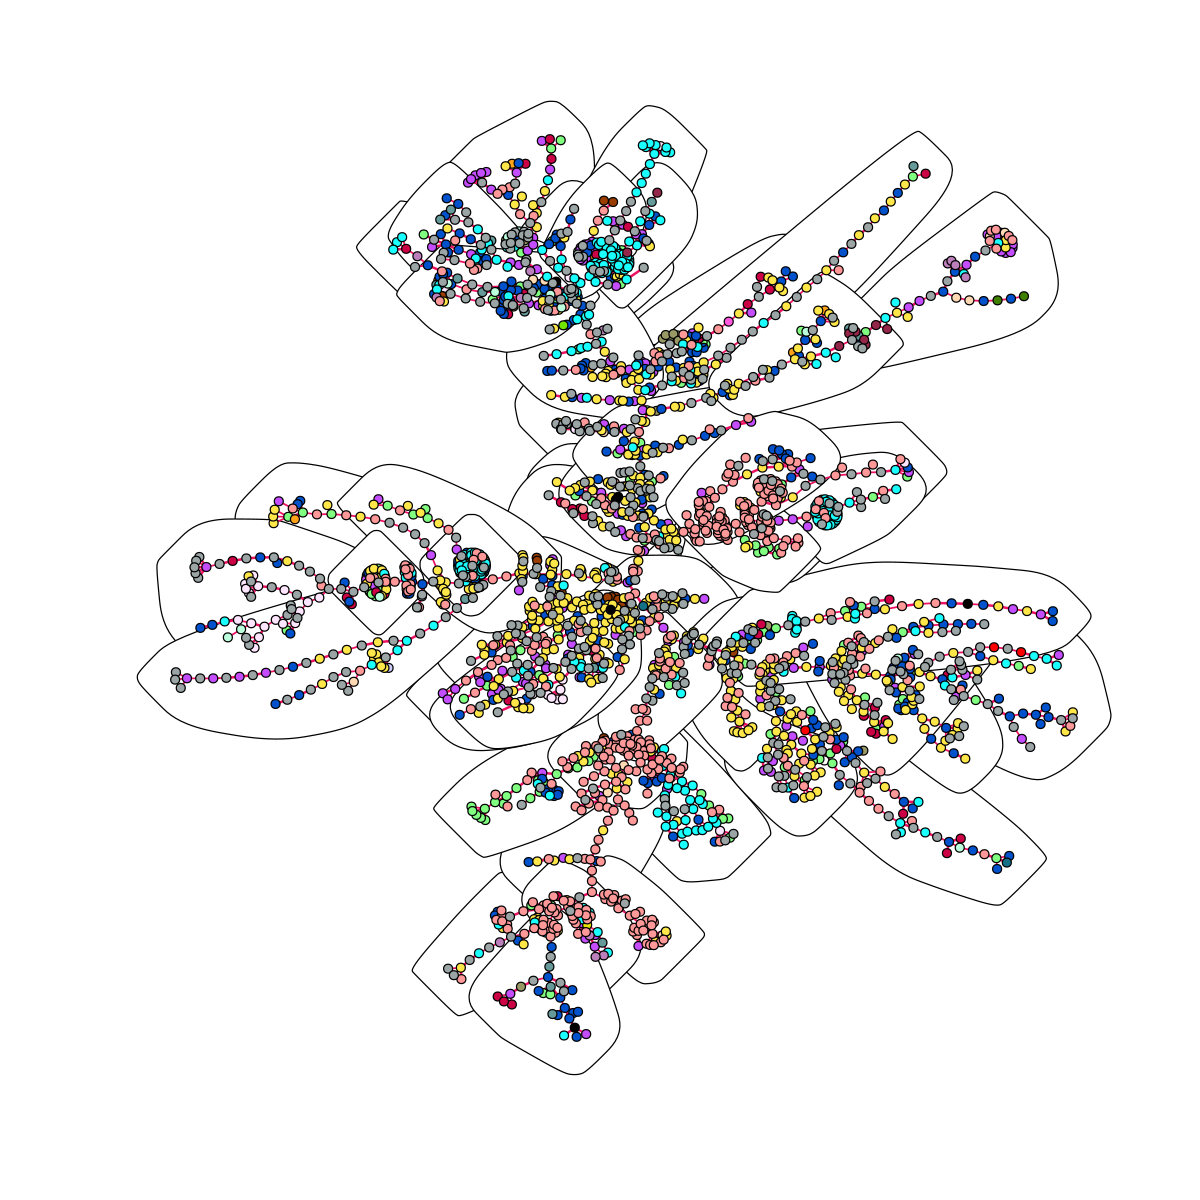

In [405]:
plot(cb, main, col=V(main)$color, mark.border="black", mark.col=c("white"), edge.color=(E(main)$color),
    vertex.size=2, vertex.label=NA, edge.width=edgeweights, edge.curved=FALSE, vertex.shape="myimg",vertex.frame.width=1,vertex.frame.color="#000000",layout=layout_with_kk)


In [310]:
grps <- split(V(main),cb$membership)
#grp <- unlist(subset(grps,mapply(`%in%`,5,grps)))
#df <- subset(get.data.frame(g),from %in% grp & to %in% grp)
grps

$`1`
+ 72/2608 vertices, named, from 75030ec:
 [1]  Alveolata_X_ko:K20989      Cercozoa_ko:K11251       
 [3]  Chlorophyta_ko:K00789      Chlorophyta_ko:K02183    
 [5]  Chlorophyta_ko:K02699      Chlorophyta_ko:K03301    
 [7]  Chlorophyta_ko:K08956      Chlorophyta_ko:K18164    
 [9]  Chlorophyta_ko:K20649      Ciliophora_ko:K09568     
[11]  Ciliophora_ko:K15102       Cryptophyta_ko:K01601    
[13]  Cryptophyta_ko:K01963      Cryptophyta_ko:K11438    
[15]  Cryptophyta_ko:K15987      Dinophyta_ko:K00545      
[17]  Dinophyta_ko:K00559        Dinophyta_ko:K01412      
[19]  Dinophyta_ko:K01899        Dinophyta_ko:K02144      
+ ... omitted several vertices

$`2`
+ 70/2608 vertices, named, from 75030ec:
 [1]  Cercozoa_ko:K00700         Cercozoa_ko:K02112       
 [3]  Cercozoa_ko:K02114         Cercozoa_ko:K02133       
 [5]  Cercozoa_ko:K09499         Cercozoa_ko:K17982       
 [7]  Chlorophyta_ko:K02893      Chlorophyta_ko:K09013    
 [9]  Ciliophora_ko:K01537       Ciliophora_ko:K02

In [311]:
main.nodes<-mst.nodes

In [406]:
netm <- get.adjacency(main, attr="weight", sparse=F)

colnames(netm) <- V(main)$def

rownames(netm) <- V(main)$def


In [407]:
edge_density(main, loops=F)

[1] 0.0007668712

In [408]:
vertex_connectivity(main)

[1] 1

In [409]:
mean_distance(main)

[1] 35.48389

In [410]:
distance_table(main)

$res
 [1]  2607 14042  9500 13050 13866 18070 20024 24979 26241 33552 28241 33707
[13] 33533 36362 37010 40443 44045 49096 49454 56410 55274 61421 64434 67145
[25] 69245 74046 75421 80170 81462 85598 81738 84461 82153 88573 81481 86046
[37] 76745 80212 77444 84028 76494 84794 76836 82756 73369 73538 64338 65203
[49] 56378 61294 52618 52557 45673 45434 39024 38265 32292 29353 25979 23932
[61] 20617 20564 18450 18346 16358 14061 12053  9825  8226  6999  6239  5281
[73]  4931  3491  3195  2431  2202  1370  1062   594   542   322   403   135
[85]   260    50    59     6

$unconnected
[1] 0

In [411]:
ecount(main)/(vcount(main)*(vcount(main)-1))

[1] 0.0003834356

In [412]:
reciprocity(main) #always 1 for an undirected graph

[1] 1

In [413]:
closeness <- closeness(main)
degree <- degree(main)
betweenness <- betweenness(main)
eig <- evcent(main)$vector

In [414]:
centrality <- data.frame(row.names   = V(main)$name,
                         degree      = degree,
                         closeness   = closeness,
                         betweenness = betweenness,
                         eigenvector = eig)

centrality <- centrality[order(row.names(centrality)),]

In [415]:
centralization.degree(main)

$res
   [1]  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  2  1  1  2
  [25]  1  1  1  1  1  2  3  1  1  1  2  1  1  3  1  1  2  1  1  1  2  2  6  3
  [49]  1  1  4  3  1  4  2  1  1  1  2  4  1  4  5  1  2  2  1  4  1  1  1  1
  [73]  2  3  1  2  1  1  3  1  1  1  1  1  1  1  1  1  1  1  6  1  3  1  1  2
  [97]  1  1  1  4  3  2  1  1  1  4  3 22  6  1  1  1  1  1  1  1  3  1  1  1
 [121]  1  1  3  1  1  1  1  4  1  3  1  1  1  2  1  1  1  1  2  1  1  1  1  4
 [145]  1  5  2  1 19  3 13  1  1  1  2  3  2  1  5  2  1  1  2  3  1  1  1  2
 [169]  1  1  4  1  2  1  1  1  1 24  1  1  1  1  2  2  3  3  2  1  1  1  1  1
 [193]  5  1  1  2  4  1  1  1  1  1  1  1  1  2  1  2  1  1  1  4  2  1  1  1
 [217]  5  1  1  4  2  2  1  1  1  1  1  1  4  4  1  1  2  1  1  3  1  1  3  1
 [241]  2  1  2  1  1  1  2  1  1  1  2  2  2  2  2  1  1  3  2  1  1  1  1  3
 [265]  1  1  1  1  1  1  3  1  1  1  2  2  1  2  1  4  1  6  1  1  1  1  2  1
 [289]  3  1  1  1  1  1  3  2  1  1  1  1  2  1  1  1  3  2  1  3  1  4  1  1
 [313]  1  3  5  7  3  4  1  1  1  1  1  2  1  1  1  2  1  1  2  1  3  1  1  1
 [337]  1  3  1  1  2  2  1  1  2  1  1  1  1  2  2  2  1  1  3  1  1  6  1  4
 [361]  1  2  1  2  1  1  1  1  1  6  1  1  1  4  1  5  1  1  1  1  1  1  1  2
 [385]  1  1  1  1  1  2  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  2  1  2
 [409]  1  1  1  3  1  1  1  1  1  1  4  2  2  1  1  1  2  1  1  1  2  1  2  1
 [433]  1  2  1  1  1  4  1  5  1  4  6  1  1  1  1  1  1  1  1  1  4  1  3  1
 [457]  1  1  6  1  1  1  1  1  1  1  2  2  1  1  3  1  1  1  1  3  3  1  1  1
 [481]  2  5  6  1  7  1  3  2  3  2  1  2  4  1  2  1  1  1  1  1  2  1  1  2
 [505]  2  1  1  2  1  1  2  8  2  1  2  8  1  1  4  1  2  2  2  1  1  1  1  1
 [529]  1  1 10  8  1  1  1  1  1  5  4  1  1  2  4  1  4  1  4  2  6  1  1  1
 [553]  1  1  1  1  1  2  8  2  2  1  1  5  1  1  4  1  1  1  1  1  6  1  2  1
 [577]  4  1  3  1  1  1  2  1  3  1  2  3  1  1  1  1  6  1  1  2  2  3  4  2
 [601]  1  1  2  2  1  1  6  2  4  1  1  4  2  2  1  1  1  2  1  1  1  1  3  1
 [625]  2  1  2  1  1  1  1  1  1  1  2  1  8  1  1  4  1  1 13  2  1  2  1  1
 [649]  1  1  1  1  1  4  2  1  1  4  1  1  1  1  4  1  1  2  2  1  1  6  2  1
 [673]  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  3  1  1  1  1  1  2  1  3
 [697]  1  1  1  1  8  1  1  1  2  2  1  1  6  2  1  1  2  1  2  1  2  1  3  4
 [721]  4  3  1  2  1  2  1  2  1  5  2  1  1  1  1  1  1  1  2  2  1  2  2  2
 [745]  1  2  1  2  6  2  2  2  1  1  4  1  4  1  8  1  1  1  1  6  2  3  1  1
 [769]  2  1  1  1  4  2  5  3  1  1  3  3  1  1  1  1  1  1  1  1  1  1  1  1
 [793]  1  4  1  2  1  1  2  3  3  1  4  3  1  1  2  1  2  2  1  1 10  1  3  1
 [817]  1  1  2  6  1  1  1  1  1  3  1  1  1  3  1  3  1  2  4  1  1  1  2  3
 [841]  2  1  1  4  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5
 [865]  1  3  1  1  1  2  1  1  1  1  2  1  2  1  2  5  1  8  2  3  1  1  2  3
 [889]  2  2  1  2  2  6  2  4 12  9  3  1  2  8  4  3  1  3  2  2  4  4  1  1
 [913]  1  2  1  3  1  1  1  1  1  3  1  6  1  7  2  5  2  3  1  2  1  1  2  4
 [937]  1  2  1  3  1  4  3  1  1  1  3  1  3  1  1  2  1  2  1  2  2  1  1  2
 [961]  1  1  1  1  2  1  2  2  1  3  1  4  1  2  2  1  1  1  5  1  2  2  1  1
 [985]  4  1  2  3  1  2  1  4  2  3  1  8  1  2  1  1  2  1  2  2  2  1  1  3
[1009]  1  1  1  1  2  3  1  1  2  1  3  2  3  4  1  3  1  5  2  1  4  1  1  2
[1033]  1  1  2  2  2  4  1  3  3  1  2  1  1  2  9  1  5  1  4  1  1  3  3  3
[1057]  1  7  1  1  1  1  1  1  1  1  1  5  2  3  3  1  1  1  4  3  6  3  2  6
[1081]  2  2  1  2  1  2  1  1  1  2  2  1  2  1  2  2  1  2  1  1  1  2  1  2
[1105]  3  1  1  1  1  1  2  4  1  2  1  4  2  1  1  3  7  6  1  4  3  1  4  1
[1129]  2  1  1  1  1  1  1  4  1  2  1  5  3  1  2  1  1  1  2  1  2  1  5  1
[1153]  1  2  2  1  1  2  1  1  1  1  1  1  4  1  1  4  2  1  1  1  3  1  3  1
[1177]  1  1  3  1  1  1  1  1  1  1  3  5  1  2  1  6  2  4  1  2  1  1  5  1
[1201]  2  1  2  1  1  1  1  2  1  1  1  2  1

In [416]:
max(centrality$degree)

[1] 88

In [417]:
degreemax<-88

In [419]:
sub<-centrality[centrality$degree %in% degreemax,]
sub #ammonium transporter is a highly connected node

degree closeness    betweenness eigenvector
NA_ko:K03320 88     1.986998e-05 222981      1

In [421]:
diameter(main, directed=F, weights=NA)

[1] 88

In [327]:
vcount(main)

[1] 2608

In [328]:
ecount(main)

[1] 2607

In [422]:
edge_density(main)

[1] 0.0007668712

[1] 0.0000000000 0.5939417178 0.2204754601 0.0801380368 0.0421779141
 [6] 0.0214723926 0.0161042945 0.0046012270 0.0061349693 0.0019171779
[11] 0.0019171779 0.0015337423 0.0019171779 0.0015337423 0.0003834356
[16] 0.0003834356 0.0003834356 0.0000000000 0.0003834356 0.0007668712
[21] 0.0007668712 0.0003834356 0.0003834356 0.0000000000 0.0003834356
[26] 0.0000000000 0.0000000000 0.0003834356 0.0000000000 0.0003834356
[31] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[36] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[41] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[46] 0.0003834356 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[51] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[56] 0.0000000000 0.0003834356 0.0000000000 0.0000000000 0.0000000000
[61] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[66] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[71] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[76] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[81] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[86] 0.0000000000 0.0000000000 0.0000000000 0.0003834356

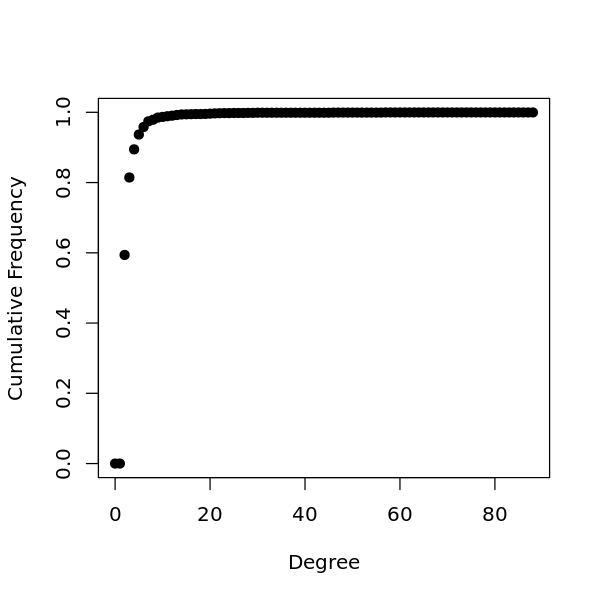

In [330]:
#From https://rstudio-pubs-static.s3.amazonaws.com/337696_c6b008e0766e46bebf1401bea67f7b10.html#degree-distribution
options(repr.plot.width = 5, repr.plot.height = 5)

deg <- degree(main, mode="all")
degree_distribution(main)

deg.dist <- degree_distribution(main, cumulative=T, mode="all")

plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1, col="black", 

      xlab="Degree", ylab="Cumulative Frequency")

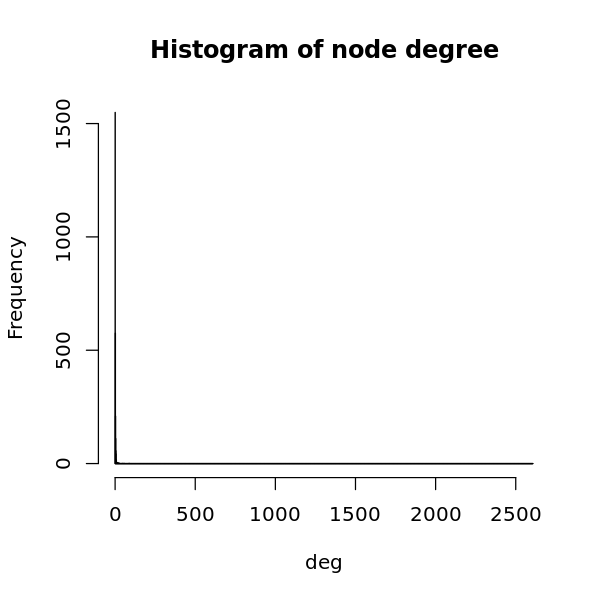

In [331]:
hist(deg, breaks=1:vcount(main)-1, main="Histogram of node degree")

In [423]:
length(cb)

[1] 52

In [334]:
membership(cb)

      Alveolata_X_ko:K20989       Apicomplexa_ko:K16465 
                          1                          30 
    Apusomonadida_ko:K01099          Cercozoa_ko:K00700 
                         51                           2 
         Cercozoa_ko:K01915          Cercozoa_ko:K02111 
                         22                           4 
         Cercozoa_ko:K02112          Cercozoa_ko:K02114 
                          2                           2 
         Cercozoa_ko:K02133          Cercozoa_ko:K02358 
                          2                          49 
         Cercozoa_ko:K02883          Cercozoa_ko:K03094 
                         52                          10 
         Cercozoa_ko:K05863          Cercozoa_ko:K09499 
                         12                           2 
         Cercozoa_ko:K11251          Cercozoa_ko:K17982 
                          1                           2 
         Cercozoa_ko:K18749          Cercozoa_ko:K20347 
                         52    

In [424]:
modularity(cb)

[1] 0.960409

In [336]:
com <- cbind(V(main),cb$membership) #V(g) gets the number of vertices
com <- cbind(V(main)$name,cb$membership) #To get names if your vertices are labeled

In [337]:
df<-as.data.frame(com)
colnames(df)<-c('name','membership')
head(df)

name                     membership
1  Alveolata_X_ko:K20989   1         
2  Apicomplexa_ko:K16465   30        
3  Apusomonadida_ko:K01099 51        
4  Cercozoa_ko:K00700      2         
5  Cercozoa_ko:K01915      22        
6  Cercozoa_ko:K02111      4

In [338]:
merge<-merge(df, main.nodes,by='name')
head(merge)

name                     membership vertex.frame.color color   taxa          
1  Alveolata_X_ko:K20989   1          black              #FFFFFE  Alveolata    
2  Apicomplexa_ko:K16465   30         black              #CCCCFF  Apicomplexa  
3  Apusomonadida_ko:K01099 51         black              #2e436b  Apusomonadida
4  Cercozoa_ko:K00700      2          black              #999966  Cercozoa     
5  Cercozoa_ko:K01915      22         black              #999966  Cercozoa     
6  Cercozoa_ko:K02111      4          black              #999966  Cercozoa     
  ko       
1 ko:K20989
2 ko:K16465
3 ko:K01099
4 ko:K00700
5 ko:K01915
6 ko:K02111

In [339]:
ye <- merge %>% count(membership, ko)
head(ye)
library(caroline)
sum<-groupBy(ye, by='membership',clmn=c('n'),aggregation='sum')
sum$membership<-rownames(sum)
colnames(sum)<-c('sum','membership')
count<-merge(sum, ye, by='membership')
count$ratio<-count$n/count$sum
head(count)

count$membership <- factor(count$membership, levels = (1:58), ordered=TRUE) 
levels(count$membership)

membership ko        n
1 1          ko:K00545 1
2 1          ko:K00559 1
3 1          ko:K00789 1
4 1          ko:K01265 1
5 1          ko:K01412 1
6 1          ko:K01601 1

membership sum ko        n ratio     
1 1          72  ko:K00545 1 0.01388889
2 1          72  ko:K00559 1 0.01388889
3 1          72  ko:K00789 1 0.01388889
4 1          72  ko:K01265 1 0.01388889
5 1          72  ko:K01412 1 0.01388889
6 1          72  ko:K01601 1 0.01388889

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58"

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


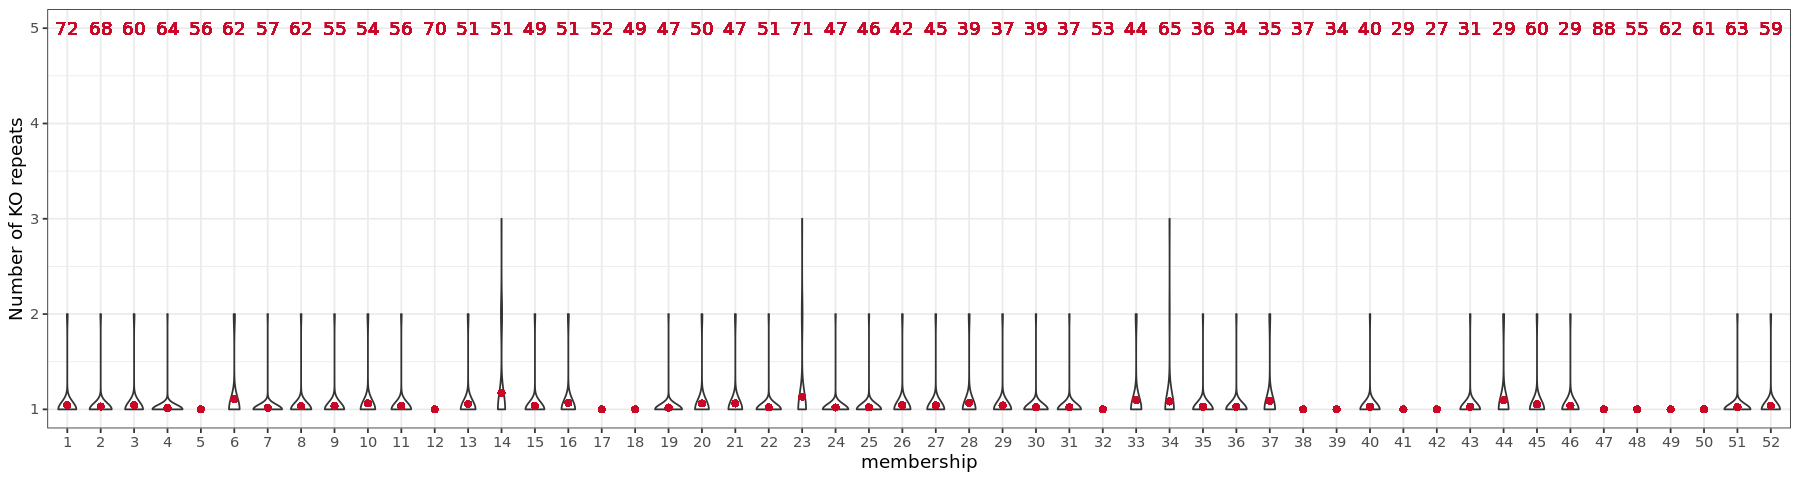

In [340]:
#Investigating the number of repeated KOs in modules (i.e., are they grouped by identical function?)
library(ggplot2)
options(repr.plot.width = 15, repr.plot.height = 4)
ggplot(count, aes(x=membership, y=n)) + 
  geom_violin() + theme_bw() + ylab("Number of KO repeats") + geom_text(aes(label = sum, x = membership, y = 5), data = count, color = '#c90828') + stat_summary(fun.y=mean, geom="point", shape=16, size=2,color = '#c90828')

In [341]:
merge3<-merge(df, main.nodes,by='name')
head(merge3)
#write.csv(merge3, 'membership_ko_taxa_network_proteins.csv')

name                     membership vertex.frame.color color   taxa          
1  Alveolata_X_ko:K20989   1          black              #FFFFFE  Alveolata    
2  Apicomplexa_ko:K16465   30         black              #CCCCFF  Apicomplexa  
3  Apusomonadida_ko:K01099 51         black              #2e436b  Apusomonadida
4  Cercozoa_ko:K00700      2          black              #999966  Cercozoa     
5  Cercozoa_ko:K01915      22         black              #999966  Cercozoa     
6  Cercozoa_ko:K02111      4          black              #999966  Cercozoa     
  ko       
1 ko:K20989
2 ko:K16465
3 ko:K01099
4 ko:K00700
5 ko:K01915
6 ko:K02111

In [343]:
netm <- get.adjacency(main, attr="weight", sparse=F)
palf <- colorRampPalette(c("gold", "dark orange"))

In [344]:
library(dplyr)

In [345]:
taxa <- merge %>% count(membership, taxa) #count each time a taxon appears in a membership cluster

In [346]:
taxa$membership <- factor(taxa$membership, levels = (1:52), ordered=TRUE) 
levels(taxa$membership)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52"

In [347]:
library(ggplot2)

In [348]:
col <- c('#CCCCFF', "#999966", "#80FF80", "#FFA319", "#C44DFF","#E6E600","#CC0044","#0052CC","#FFD9B3","#47D1D1","#669999", "#FFE6FF","#993D00","#73E601","#FFE74A","#000000","#FF9999","#AC3AAC","#408000","#FF0000","#19FFFF","#FF704D","#9ca5a6")

In [349]:
options(repr.plot.width = 15, repr.plot.height = 5)

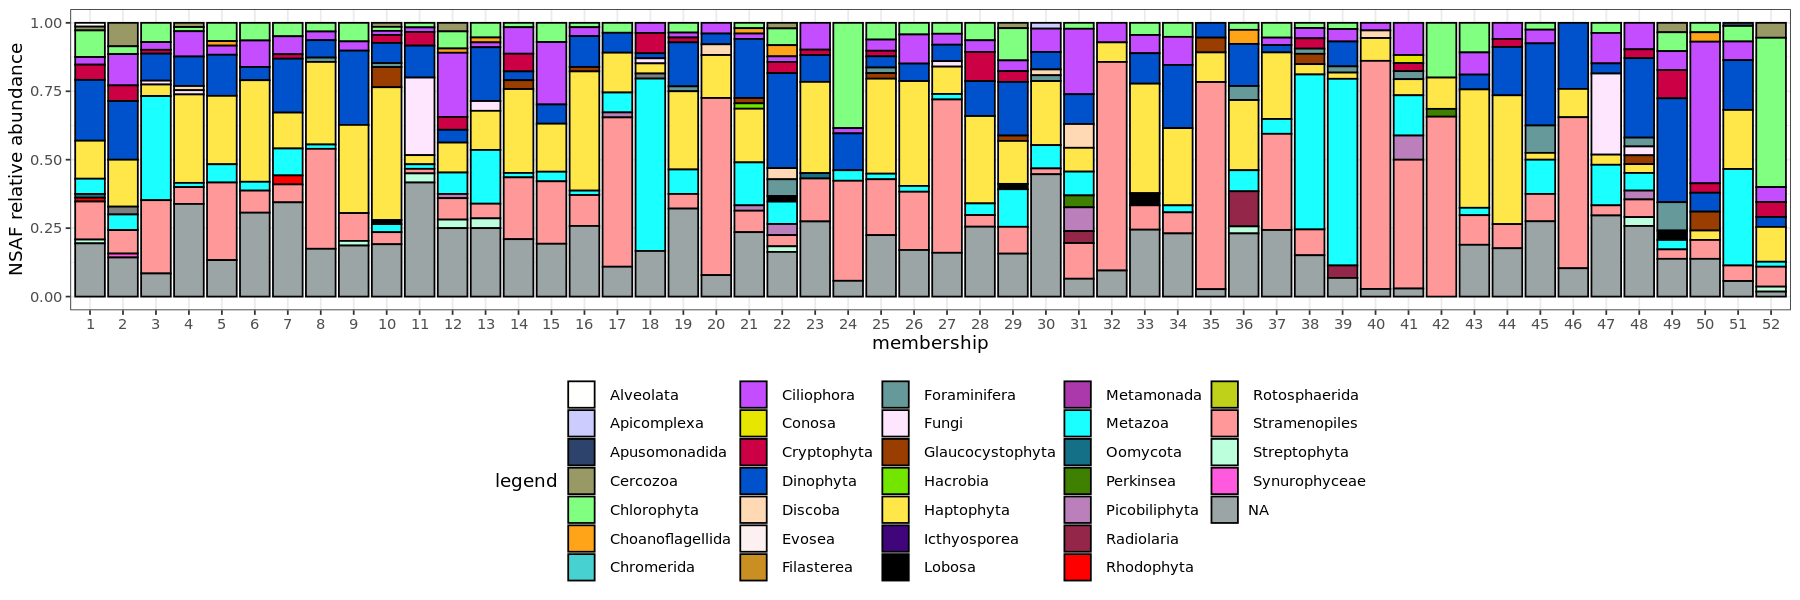

In [350]:
ggplot(taxa, aes(fill=taxa, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity",colour="black") + theme_bw() + ylab("NSAF relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=cols)

In [351]:
ko<-main.nodes$ko

In [352]:
ko2<-unique(ko)

In [354]:
ko2brite<-read.csv('ko2brite.csv',header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1") #"Enzyme" category not included - too broad

In [355]:
colnames(ko2brite)<-c('BRITE','ko','x','x1','x2')
merge2<-merge(ko2brite, merge, by='ko',all=T) #If KO has two BRITE categories, each BRITE gets 1 KO count
test1<-merge2[!is.na(merge2$name), ] #Remove KO/BRITE rows without matches to dataset
merge2<-test1

In [356]:
head(merge2)

ko        BRITE x  x1 x2 name                       membership
1 ko:K00001 NA    NA NA NA  Dinophyta_ko:K00001       22        
3 ko:K00006 NA    NA NA NA  Haptophyta_ko:K00006      23        
4 ko:K00006 NA    NA NA NA NA_ko:K00006               5         
5 ko:K00012 NA    NA NA NA  Stramenopiles_X_ko:K00012 45        
6 ko:K00012 NA    NA NA NA  Haptophyta_ko:K00012      6         
7 ko:K00015 NA    NA NA NA  Stramenopiles_X_ko:K00015 35        
  vertex.frame.color color   taxa          
1 black              #0052CC  Dinophyta    
3 black              #FFE74A  Haptophyta   
4 black              #9ca5a6 NA            
5 black              #ff9999  Stramenopiles
6 black              #FFE74A  Haptophyta   
7 black              #ff9999  Stramenopiles

In [357]:
func <- merge2 %>% count(membership, BRITE) #count each time a BRITE category appears in a membership cluster

In [358]:
options(repr.plot.width = 15, repr.plot.height = 5.5)

In [359]:
KO<-c('ko01007 Amino acid related enzymes','ko01009 Protein phosphatases and associated proteins','ko01002 Peptidases and inhibitors','ko01001 Protein kinases','ko04031 GTP-binding proteins','ko03012 Translation factors','ko03011 Ribosome','ko03009 Ribosome biogenesis','ko03019 Messenger RNA biogenesis','ko03036 Chromosome and associated proteins','ko03021 Transcription machinery','ko03016 Transfer RNA biogenesisæ','ko03400 DNA repair and recombination proteins','ko03032 DNA replication proteins','ko03000 Transcription factors','ko00194 Photosynthesis proteinsæ','ko03029 Mitochondrial biogenesis','ko04040 Ion channels','ko02000 Transporters','ko04090 CD molecules','ko04131 Membrane trafficking','ko02044 Secretion system','ko04030 G protein-coupled receptors','ko01003 Glycosyltransferases','ko00536 Glycosaminoglycan binding proteins','ko01004 Lipid biosynthesis proteins','ko04091 Lectins','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins','ko01008 Polyketide biosynthesis proteins','ko03051 Proteasome','ko04121 Ubiquitin system','ko03041 Spliceosome','ko03110 Chaperones and folding catalysts','ko04147 Exosome','ko04515 Cell adhesion molecules','ko02035 Bacterial motility proteinsæ','ko04054 Pattern recognition receptors','ko00199 Cytochrome P450','ko04990 Domain-containing proteins not elsewhere classified','ko04812 Cytoskeleton proteins','Other')

In [360]:
func$BRITE <- factor(func$BRITE, levels = KO, ordered=TRUE)

In [361]:
kegg<-c('ko01007 Amino acid related enzymes'='#FA0404','ko01009 Protein phosphatases and associated proteins'='#FB5F5F','ko01002 Peptidases and inhibitors'='#FB9F9F','ko01001 Protein kinases'='#BD4646','ko04031 GTP-binding proteins'='#F2670D','ko03012 Translation factors'='#D67637','ko03011 Ribosome'='#B85A1C','ko03009 Ribosome biogenesis'='#984610','ko03019 Messenger RNA biogenesis'='#F6BA0E','ko03036 Chromosome and associated proteins'='#DBB340','ko03021 Transcription machinery'='#AFA619','ko03016 Transfer RNA biogenesisæ'='#E6DA1E','ko03400 DNA repair and recombination proteins'='#FBEC06','ko03032 DNA replication proteins'='#CEFB06','ko03000 Transcription factors'='#BFE125','ko00194 Photosynthesis proteinsæ'='#3CFA04','ko03029 Mitochondrial biogenesis'='#4EC62A','ko04040 Ion channels'='#37D782','ko02000 Transporters'='#1DB062','ko04090 CD molecules'='#2DF7BD','ko04131 Membrane trafficking'='#16B98A','ko02044 Secretion system'='#16E6E3','ko04030 G protein-coupled receptors'='#19BBB9','ko01003 Glycosyltransferases'='#19A0BB','ko00536 Glycosaminoglycan binding proteins'='#0B6D81','ko01004 Lipid biosynthesis proteins'='#0c1a63','ko04091 Lectins'='#1F8ACB','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins'='#0A6FF7','ko01008 Polyketide biosynthesis proteins'='#043BF7','ko03051 Proteasome'='#2E08C8','ko04121 Ubiquitin system'='#5643A5','ko03041 Spliceosome'='#9084C4','ko03110 Chaperones and folding catalysts'='#9D24EB','ko04147 Exosome'='#B96BEB','ko04515 Cell adhesion molecules'='#F028E3','ko02035 Bacterial motility proteinsæ'='#D87AD2','ko04054 Pattern recognition receptors'='#F93875','ko00199 Cytochrome P450'='#f296b9','ko04990 Domain-containing proteins not elsewhere classified'='#f0dfe7','ko04812 Cytoskeleton proteins'='#FFFFFE','Other'='#000000')

In [362]:
func$membership <- factor(func$membership, levels = (1:58), ordered=TRUE)

In [363]:
library(ggplot2)

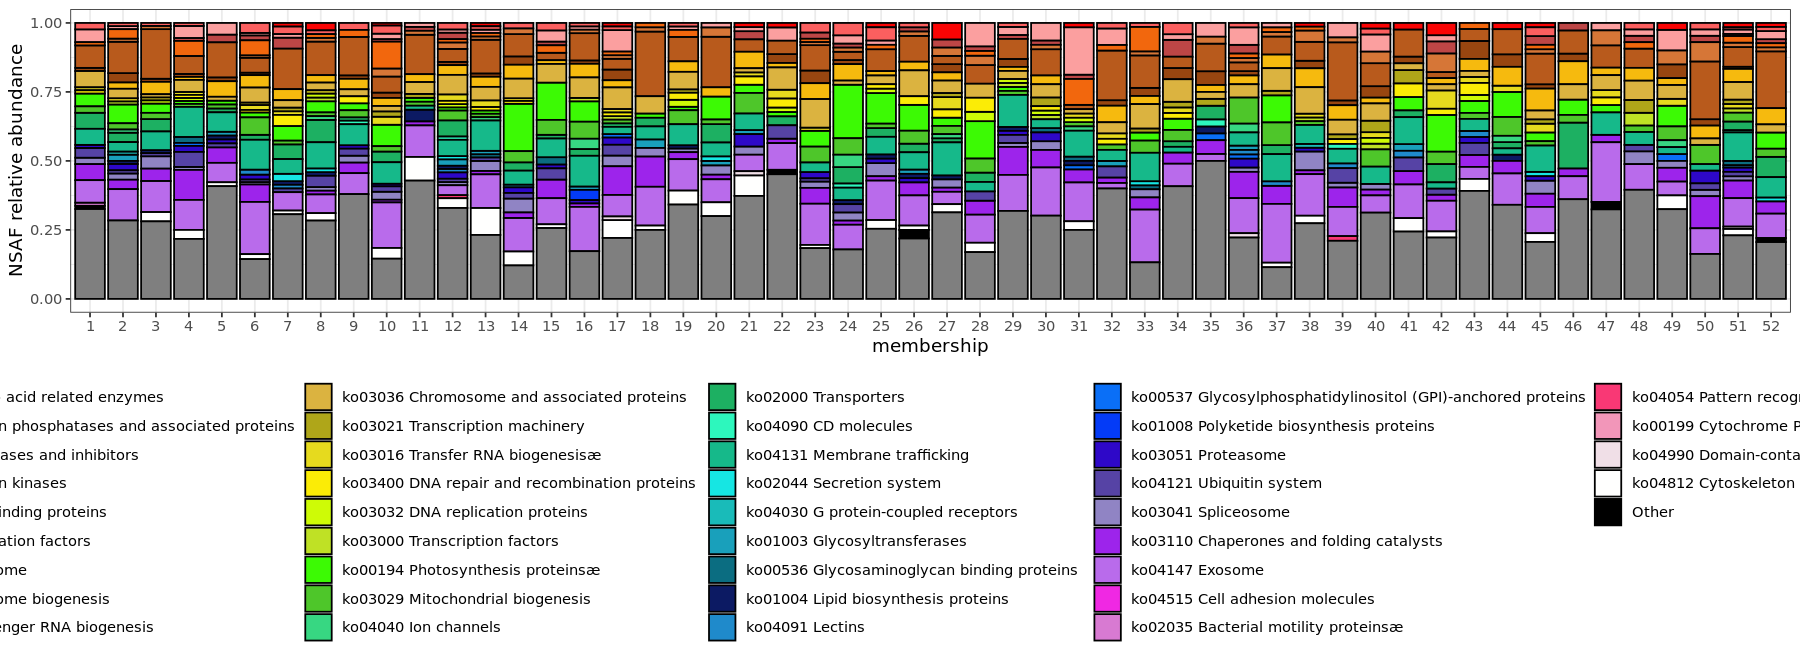

In [364]:
ggplot(func, aes(fill=BRITE, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity", colour="black") + theme_bw() + ylab("NSAF relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=kegg)

In [367]:
library(tmod)

In [368]:
membership<-as.data.frame(com)

In [369]:
colnames(membership)<-c('gene_id','geneset_id')

In [370]:
res <- makeTmodFromDataFrame(membership, feature_col="gene_id", module_col="geneset_id")

unlisting m2g

making Tmod



In [371]:
eig<-eigengene(d, rownames(d), res)

In [372]:
cor_eig<-cor(eig)

In [373]:
library(ggcorrplot)

In [374]:
p.mat <- ggcorrplot::cor_pmat(cor_eig)

In [375]:
head(p.mat)

1_30_0.2     1_115_0.2    1_30_3       1_115_3      1_150       
1_30_0.2  0.000000e+00 3.504866e-01 1.709674e-19 7.431221e-23 2.621866e-01
1_115_0.2 3.504866e-01 0.000000e+00 9.788591e-01 3.309824e-02 3.669438e-23
1_30_3    1.709674e-19 9.788591e-01 0.000000e+00 1.030647e-10 1.546749e-01
1_115_3   7.431221e-23 3.309824e-02 1.030647e-10 0.000000e+00 8.879052e-01
1_150     2.621866e-01 3.669438e-23 1.546749e-01 8.879052e-01 0.000000e+00
1_200     2.512382e-30 1.443298e-02 6.237060e-12 5.394780e-16 6.471633e-01
          1_200        1_300        1_400        1_600        1_800        ⋯
1_30_0.2  2.512382e-30 5.250537e-34 3.121894e-33 3.493897e-33 2.988711e-18 ⋯
1_115_0.2 1.443298e-02 1.786738e-03 1.444229e-03 1.548947e-03 7.205962e-04 ⋯
1_30_3    6.237060e-12 5.378621e-12 7.781512e-12 8.726186e-12 4.841933e-08 ⋯
1_115_3   5.394780e-16 8.427372e-18 1.395669e-17 1.696895e-17 1.775154e-12 ⋯
1_150     6.471633e-01 4.114013e-01 3.937770e-01 4.305854e-01 1.356994e-01 ⋯
1_200     0.000000e+00 3.437984e-59 4.856988e-60 1.265364e-61 3.158774e-24 ⋯
          7_150        7_300        8_20         8_40         8_120       
1_30_0.2  3.396167e-19 5.154578e-33 3.037214e-33 1.226315e-20 1.650555e-08
1_115_0.2 7.012653e-02 1.332431e-03 7.507575e-02 1.552820e-02 3.328333e-03
1_30_3    8.969725e-10 8.683016e-12 3.436683e-12 5.652496e-09 3.136260e-04
1_115_3   1.359196e-09 1.281449e-17 1.806786e-16 1.518176e-11 7.178830e-07
1_150     1.014715e-01 3.459047e-01 4.912221e-01 6.683531e-01 9.722000e-02
1_200     3.855801e-40 1.822157e-57 1.456986e-48 2.279084e-32 2.465226e-10
          8_175        8_400        8_800        8_250        8_600       
1_30_0.2  7.010063e-30 6.108030e-33 3.449898e-18 5.013441e-32 1.193145e-32
1_115_0.2 3.171831e-04 1.643239e-03 6.608596e-04 1.449024e-03 1.096186e-03
1_30_3    3.803454e-11 7.762846e-12 9.205573e-09 6.855275e-12 1.169432e-11
1_115_3   4.411295e-17 1.709242e-17 1.513278e-12 3.788135e-17 1.367733e-17
1_150     1.412257e-01 3.691404e-01 1.072986e-01 3.755295e-01 2.913937e-01
1_200     6.261121e-50 4.369415e-57 3.228391e-25 1.454829e-58 3.832749e-55

In [440]:
#ggcorrplot(cor_eig,hc.order=TRUE,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black",p.mat=p.mat, sig.level=0.05)

In [377]:
t_eig<-t(eig)
t_eig<-as.data.frame(t_eig)

In [378]:
t_eig$ID<-rownames(t_eig)
t_eig<-as.data.frame(t_eig)

In [379]:
cors<-read.csv('correlations.csv')

In [380]:
merge<-merge(t_eig, cors, by="ID")

In [381]:
head(merge[1:5,49:65])

20          48         18         46         35         Station depth
1  0.05419701 -0.6548415 -0.6935913  0.4279379  0.3902802 1       115  
2 -0.92987982 -0.6548415 -0.6935913  2.5732381 -0.2843287 1       115  
3 -1.89824720 -0.6548415 -0.6935913 -1.7531028 -1.1449625 1       200  
4 -1.84225599 -0.6548415 -0.6935913 -0.5407812 -1.1449625 1        30  
5 -1.71267766 -0.6548415 -0.6935913  1.8636168 -1.1449625 1        30  
  Fe        Zn        Cd          Ni       Cu        Mn        PO4  NO2.NO3 Si 
1 0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526 0.23 1.4     0.4
2 0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526 0.23 1.4     0.4
3 0.2293162 1.3929529 0.010309019 2.040288 0.9952482 0.9434531 0.20 1.4     0.3
4 0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186 0.18 0.2     0.3
5 0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186 0.18 0.2     0.3
  NO2 
1 0.10
2 0.10
3 0.02
4 0.02
5 0.02

In [382]:
merge<-merge[,-54]# remove station column

In [383]:
rownames(merge)<-merge$ID

In [384]:
merge<-merge[,-1]

In [385]:
library(ggcorrplot)

In [386]:
corr <- cor(merge)

In [388]:
options(repr.plot.width = 20, repr.plot.height = 20)

In [389]:
cors<-cors[,-1]

In [390]:
cors<-cors[with(cors, order(ID)),] #sort by ID

In [391]:
 t_eig<-t_eig[with(t_eig, order(ID)),] #sort by ID

In [392]:
t_eig<-t_eig[(t_eig$ID %in% cors$ID),] #remove rows not shared in other df

In [393]:
cors<-cors[(cors$ID %in% t_eig$ID),] #remove rows not shared in other df

In [395]:
cors<-cors[,-2]

In [396]:
head(t_eig)

1           30         51         2          22         4          
1_115_0.2  2.22282196 -0.5663452 -0.9560958 -0.9910278 -0.8874705 -0.08918823
1_115_3   44.88817437 -0.5663452 -0.9560958 -0.7563751 -0.2982087  8.57844944
1_200     -0.81262839 -0.5663452 -0.9560958 -1.0257369  0.2820216 -1.73411270
1_30_0.2  -0.04962132 -0.5663452 -0.9560958 -1.0257369 -1.0159700  1.45561680
1_30_3    -0.05584423 -0.5663452 -0.9560958 -0.8590511 -0.8870454 24.97525697
1_400     -0.81262839 -0.5663452 -0.9560958 -1.0257369  0.6606307 -1.73411270
          49         52         10          12         ⋯ 44          23        
1_115_0.2 -0.3698712 -0.8017431  0.59953655 -0.4158623 ⋯ -0.04791472  0.1439822
1_115_3   -0.3698712 -0.8017431  2.60084561 -0.3812327 ⋯  0.50235123  7.1535436
1_200     -0.2715077 -0.8017431 -2.99505666  2.5411398 ⋯ -2.30159598 -3.0319561
1_30_0.2  -0.3698712 -0.8017431  0.03285914  0.3932150 ⋯ -1.34915893  0.3260927
1_30_3    -0.3698712 -0.8017431  2.02573818 -0.6694721 ⋯  0.52297891  9.1704026
1_400     -0.3698712 -0.8017431 -3.21277774 -0.7470844 ⋯ -2.83326164 -4.3443089
          32         40         20          48         18         46        
1_115_0.2 -0.9411435 -0.7265966  0.05419701 -0.6548415 -0.6935913  0.4279379
1_115_3   -0.9411435 -0.8736501 -0.92987982 -0.6548415 -0.6935913  2.5732381
1_200     -0.9411435 -0.5453931 -1.89824720 -0.6548415 -0.6935913 -1.7531028
1_30_0.2  -0.9411435 -1.0190552 -1.84225599 -0.6548415 -0.6935913 -0.5407812
1_30_3    -0.7150223 -0.9822489 -1.71267766 -0.6548415 -0.6935913  1.8636168
1_400     -0.9411435 -1.0190552 -1.99966570 -0.6548415 -0.6935913 -1.9798092
          35         ID       
1_115_0.2  0.3902802 1_115_0.2
1_115_3   -0.2843287 1_115_3  
1_200     -1.1449625 1_200    
1_30_0.2  -1.1449625 1_30_0.2 
1_30_3    -1.1449625 1_30_3   
1_400     -1.1449625 1_400

In [397]:
t_eig<-t_eig[,-53] #spearman

In [398]:
colnames(t_eig)<-as.factor(colnames(t_eig))

In [399]:
library(psych)
correlation<-corr.test(x=t_eig,y=cors, method=c("spearman"))

In [400]:
p.mat <- correlation$p

In [401]:
options(repr.plot.width = 20, repr.plot.height = 5)

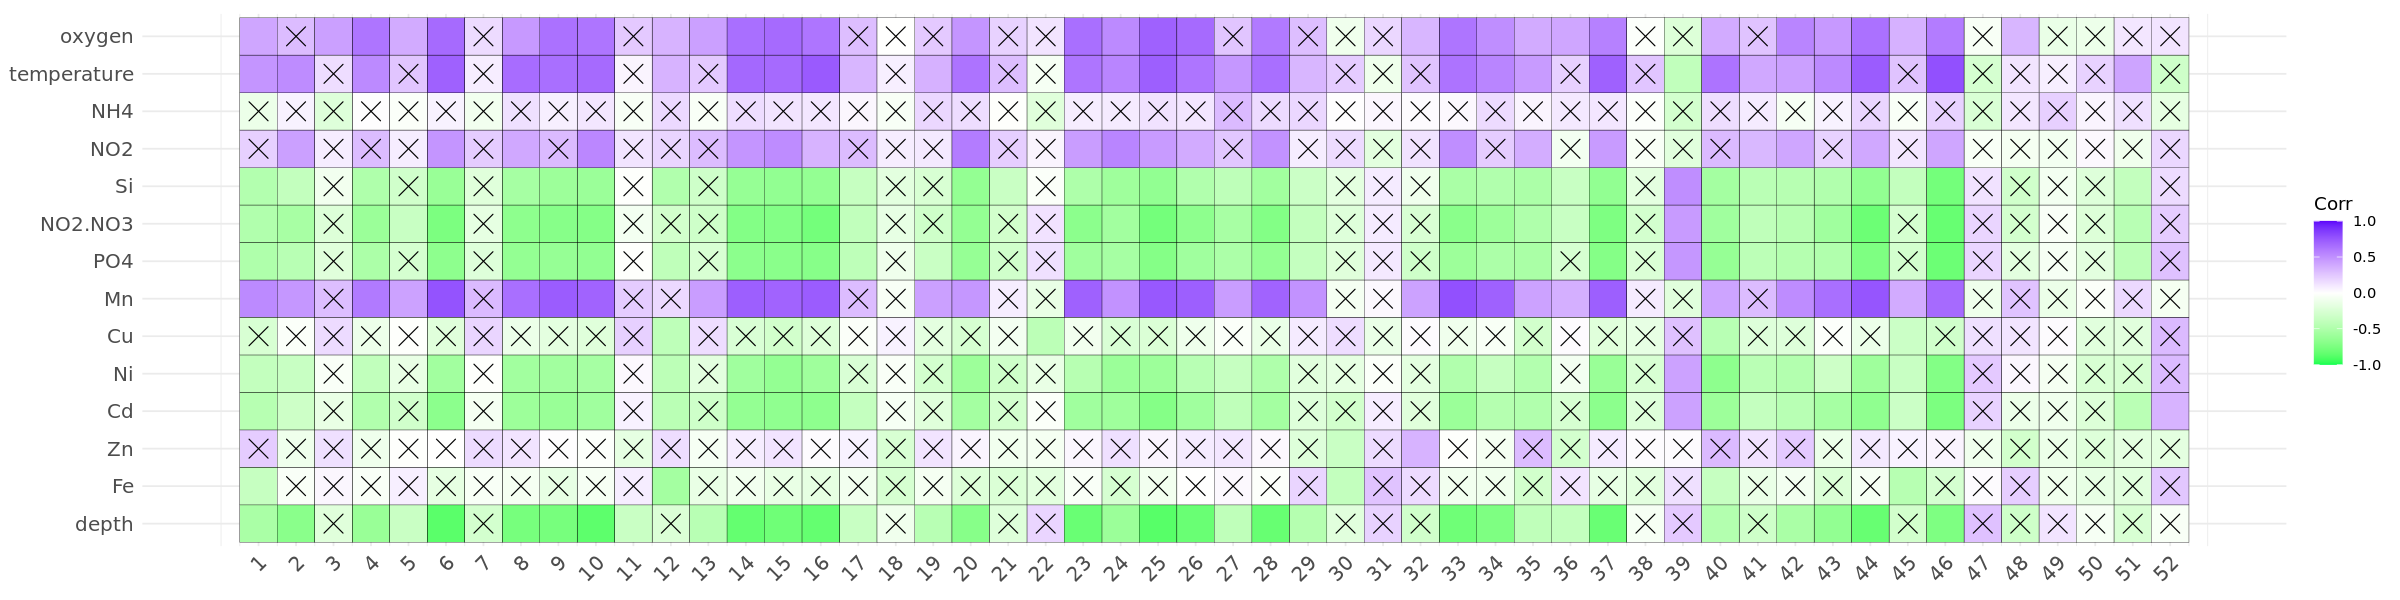

In [402]:
ggcorrplot(correlation$r,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black", p.mat=p.mat,sig.level=0.05) + ggplot2::scale_x_continuous(breaks = seq(1, 52, 1))

In [403]:
main

IGRAPH 75030ec UNW- 2608 2607 -- 
+ attr: name (v/c), vertex.frame.color (v/c), color (v/c), weight
| (e/n), color (e/c)
+ edges from 75030ec (vertex names):
 [1]  Alveolata_X_ko:K20989  --NA_ko:K10645            
 [2]  Apicomplexa_ko:K16465  --NA_ko:K17266            
 [3]  Apusomonadida_ko:K01099--NA_ko:K03320            
 [4]  Cercozoa_ko:K00700     --NA_ko:K22416            
 [5]  Cercozoa_ko:K01915     -- Picobiliphyta_ko:K16465
 [6]  Cercozoa_ko:K02111     -- Haptophyta_ko:K07908   
 [7]  Cercozoa_ko:K02112     --NA_ko:K22416            
+ ... omitted several edges

# PLS regression with proteins

From above, read in spectral counts, NSAF normalize, read in eggnog annotations and split by KO. Begin with merged product under variable ("x")

In [18]:
gois<-read.csv('Sun2021ISME.csv') #List of nutrient-related KEGG genes from Sun et al. (2021) ISME
gois$KO_def<-paste(gois$KO, gois$def,sep='_')
colnames(gois)<-c('KEGG_ko','def','id','KO_def')
new<-merge(x, gois, by='KEGG_ko')

In [20]:
library(dplyr) #Sum all euk divisions together
x<-new
x<-x[,-2]
x<-x[,-90]
x<-x[,-89]
x<-x[,-88]
d <- x %>%
    group_by(KEGG_ko) %>% summarise_all(funs(sum))
head(d)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


KEGG_ko   1_30_0.2 1_115_0.2 1_30_3     1_115_3    1_150      1_200 1_300
1 ko:K00235 0        0         0.02117935 0.03394501 0.06446596 0     0    
2 ko:K00261 0        0         0.00000000 0.01730887 0.00000000 0     0    
3 ko:K00262 0        0         0.00000000 0.00000000 0.00000000 0     0    
4 ko:K00264 0        0         0.00000000 0.00000000 0.00000000 0     0    
5 ko:K00266 0        0         0.00000000 0.00000000 0.00000000 0     0    
6 ko:K00284 0        0         0.00000000 0.00000000 0.00000000 0     0    
  1_400 1_600 1_800 1_20       1_175      1_250      1_350 2_20      
1 0     0     0     0.08319523 0.07714035 0.04174508 0     0.06813322
2 0     0     0     0.00000000 0.00000000 0.00000000 0     0.00000000
3 0     0     0     0.00000000 0.00000000 0.00000000 0     0.00000000
4 0     0     0     0.00000000 0.00000000 0.00000000 0     0.00000000
5 0     0     0     0.00000000 0.00000000 0.00000000 0     0.00000000
6 0     0     0     0.00000000 0.00000000 0.00000000 0     0.00000000
  2_60       2_90       2_120      2_150 2_800 2_200 2_400 2_600 3_200     
1 0.03649096 0.00000000 0.07225715 0     0     0     0     0     0.09498933
2 0.00000000 0.03264344 0.06952280 0     0     0     0     0     0.00000000
3 0.00000000 0.00000000 0.00000000 0     0     0     0     0     0.00000000
4 0.00000000 0.00000000 0.00000000 0     0     0     0     0     0.00000000
5 0.00000000 0.00000000 0.00000000 0     0     0     0     0     0.00000000
6 0.00000000 0.00000000 0.00000000 0     0     0     0     0     0.00000000
  3_400 3_600 3_800 3_10       3_700 3_1000 3_1200 3_20       3_30    
1 0     0     0     0.04306506 0     0      0      0.04513784 0.147542
2 0     0     0     0.00000000 0     0      0      0.00000000 0.000000
3 0     0     0     0.00000000 0     0      0      0.00000000 0.000000
4 0     0     0     0.00000000 0     0      0      0.00000000 0.000000
5 0     0     0     0.00000000 0     0      0      0.00000000 0.000000
6 0     0     0     0.00000000 0     0      0      0.00000000 0.000000
  3_45       3_60 3_75       3_90      3_105 3_120 ⋯ 5_200      5_400 5_600
1 0.04593189 0    0.04692226 0.1673707 0     0     ⋯ 0.00000000 0     0    
2 0.00000000 0    0.00000000 0.0000000 0     0     ⋯ 0.01433306 0     0    
3 0.00000000 0    0.00000000 0.0000000 0     0     ⋯ 0.01433306 0     0    
4 0.00000000 0    0.00000000 0.0000000 0     0     ⋯ 0.00000000 0     0    
5 0.00000000 0    0.00000000 0.0000000 0     0     ⋯ 0.00000000 0     0    
6 0.00000000 0    0.00000000 0.0000000 0     0     ⋯ 0.00000000 0     0    
  5_880      6_4100 6_3000 6_4000 6_3500 6_2500 6_4050     6_20      
1 0.02903082 0      0      0      0      0      0.00000000 0.07090035
2 0.00000000 0      0      0      0      0      0.06044565 0.00000000
3 0.00000000 0      0      0      0      0      0.00000000 0.00000000
4 0.00000000 0      0      0      0      0      0.00000000 0.00000000
5 0.00000000 0      0      0      0      0      0.00000000 0.00000000
6 0.00000000 0      0      0      0      0      0.00000000 0.00000000
  6_40       6_70       6_110      6_150      6_200 6_400 6_600 6_800
1 0.08534381 0.05203663 0.01773359 0.02881628 0     0     0     0    
2 0.00000000 0.00000000 0.00000000 0.00000000 0     0     0     0    
3 0.00000000 0.00000000 0.00000000 0.00000000 0     0     0     0    
4 0.00000000 0.00000000 0.00000000 0.00000000 0     0     0     0    
5 0.00000000 0.00000000 0.00000000 0.00000000 0     0     0     0    
6 0.00000000 0.00000000 0.00000000 0.00000000 0     0     0     0    
  6_1000     6_1500 6_2000 7_20       7_40       7_70       7_700    
1 0.03105502 0      0      0.03622678 0.03604073 0.03688753 0.0000000
2 0.00000000 0      0      0.00000000 0.00000000 0.00000000 0.1272787
3 0.00000000 0      0      0.00000000 0.00000000 0.00000000 0.1272787
4 0.00000000 0      0      0.00000000 0.00000000 0.00000000 0.0000000
5 0.00000000 0      0      0.00000000 0.00000000 0.00000000 0.0000000
6 0.00000000 0     

In [21]:
d<-as.data.frame(d)
rownames(d)<-d$KEGG_ko

In [53]:
e<-merge(d, gois, by='KEGG_ko')
e<-e[,-1]
rownames(e)<-e$KO_def
e<-e[,-89]
e<-e[,-88]
e<-e[,-87]
head(e)

1_30_0.2
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0       
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0       
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0       
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0       
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        0       
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           0       
                                                                                            1_115_0.2
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0        
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0        
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0        
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0        
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        0        
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           0        
                                                                                            1_30_3    
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0.02117935
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0.00000000
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0.00000000
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0.00000000
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        0.00000000
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           0.00000000
                                                                                            1_115_3   
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0.03394501
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0.01730887
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0.00000000
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0.00000000
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        0.00000000
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           0.00000000
                                                                                            1_150     
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0.06446596
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0.00000000
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0.00000000
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0.00000000
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        0.00000000
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           0.00000000
                                                                                            1_200
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 0    
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     0    
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      0    
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     0    
ko:K00266_gltD; gl

In [23]:
e<-e[apply(e[,-1], 1, function(x) !all(x==0)),] #remove rows with all 0

In [24]:
rowSums(e)

ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] 
                                                                                      2.06172099 
                         ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3] 
                                                                                      0.36215061 
                          ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4] 
                                                                                      0.14161172 
                                         ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14] 
                                                                                      0.05478066 
                            ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13] 
                                                                                      0.05478066 
                               ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1] 
                                                                                      0.09977058 
                                       ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1] 
                                                                                      0.09128967 
ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8] 
                                                                                      0.37689486 
                                    ko:K00459_ncd2, npd; nitronate monooxygenase [EC:1.13.12.16] 
                                                                                      0.04180184 
                                              ko:K00522_FTH1; ferritin heavy chain [EC:1.16.3.2] 
                                                                                      0.36617126 
                                                  ko:K01455_E3.5.1.49; formamidase [EC:3.5.1.49] 
                                                                                     12.64786763 
                                                    ko:K01725_cynS; cyanate lyase [EC:4.2.1.104] 
                                                                                      0.04141057 
                                         ko:K01915_glnA, GLUL; glutamine synthetase [EC:6.3.1.2] 
                                                                                     12.65923505 
                                ko:K02014_TC.FEV.OM; iron complex outermembrane recepter protein 
                                                                                      7.07711750 
                            ko:K02040_pstS; phosphate transport system substrate-binding protein 
                                                                                      6.34820108 
                        ko:K02552_menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2] 
                                                                                      1.61487137 
       ko:K02575_NRT, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter 
                                                                                      0.68498329 
                        ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6] 
                                                                                     11.33083143 
                                                     ko:K02641_petH; ferredoxin--NADP+ reductase 
                                                                                      5.36212832 
                                                      ko:K03306_ inorganic phosphate transporter 
                                                                                      0.81222532 
                                               ko:K03561_exbB; biopolymer transport p

In [25]:
e<-e[apply(e[,-1], 1, function(x) !all(x<0.01)),] #remove rows with aggregated KO sum (across divisions) less than 0.01 NSAF

In [26]:
t.e<-as.data.frame(t(e))
cor<-read.csv('correlations.csv') #read in environmental metdata
rownames(cor)<-cor$ID
cor<-cor[,-1]
cor<-cor[,-2]
head(cor)

depth Fe        Zn        Cd          Ni       Cu        Mn       
1_30_0.2   30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186
1_30_3     30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186
1_115_0.2 115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526
1_115_3   115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526
1_200     200   0.2293162 1.3929529 0.010309019 2.040288 0.9952482 0.9434531
1_400     400   0.2468678 1.5025311 0.024282722 2.173032 0.8186114 0.4520188
          PO4  NO2.NO3 Si  NO2  NH4  temperature oxygen
1_30_0.2  0.18 0.2     0.3 0.02 0.09 22.81       218.60
1_30_3    0.18 0.2     0.3 0.02 0.09 22.81       218.60
1_115_0.2 0.23 1.4     0.4 0.10 0.00 19.91       208.66
1_115_3   0.23 1.4     0.4 0.10 0.00 19.91       208.66
1_200     0.20 1.4     0.3 0.02 0.14 19.28       208.63
1_400     0.40 4.2     1.2 0.02 0.04 18.37       195.14

In [27]:
#BiocManager::install('mixOmicsTeam/mixOmics@1923e1a3987c7bd4de1c9610dd157e61639c472e')
library('mixOmics')

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.13.114
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [28]:
#Remove the rows (samples) without corresponding metadata

In [30]:
t.e$ID<-rownames(t.e)
cor$ID<-rownames(cor)
merge<-merge(t.e, cor, by='ID')
head(merge[1:5,37:50])

depth Fe        Zn        Cd          Ni       Cu        Mn        PO4 
1 115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526 0.23
2 115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018 1.2980526 0.23
3 200   0.2293162 1.3929529 0.010309019 2.040288 0.9952482 0.9434531 0.20
4  30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186 0.18
5  30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448 2.5443186 0.18
  NO2.NO3 Si  NO2  NH4  temperature oxygen
1 1.4     0.4 0.10 0.00 19.91       208.66
2 1.4     0.4 0.10 0.00 19.91       208.66
3 1.4     0.3 0.02 0.14 19.28       208.63
4 0.2     0.3 0.02 0.09 22.81       218.60
5 0.2     0.3 0.02 0.09 22.81       218.60

In [31]:
rownames(merge)<-merge$ID

In [32]:
t.e<-merge[1:36]
t.e<-t.e[,-1]
cor<-merge[37:50]
t.e<-t.e[, colSums(t.e != 0) > 0] #remove columns that sum to 0
t.e<-t.e[apply(t.e[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0

In [33]:
t.e<-sapply(t.e, as.numeric)
t.e<-as.data.frame(t.e)
rownames(t.e)<-merge$ID

In [34]:
X = t.e #Get rid of columns with values close to 0 so perf can run on proteins
Y = cor

In [37]:
head(X)

ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]
1_115_0.2 0.00000000                                                                                 
1_115_3   0.03394501                                                                                 
1_200     0.00000000                                                                                 
1_30_0.2  0.00000000                                                                                 
1_30_3    0.02117935                                                                                 
1_400     0.00000000                                                                                 
          ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]
1_115_0.2 0.00000000                                                             
1_115_3   0.01730887                                                             
1_200     0.00000000                                                             
1_30_0.2  0.00000000                                                             
1_30_3    0.00000000                                                             
1_400     0.00000000                                                             
          ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]
1_115_0.2 0                                                                     
1_115_3   0                                                                     
1_200     0                                                                     
1_30_0.2  0                                                                     
1_30_3    0                                                                     
1_400     0                                                                     
          ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]
1_115_0.2 0                                                      
1_115_3   0                                                      
1_200     0                                                      
1_30_0.2  0                                                      
1_30_3    0                                                      
1_400     0                                                      
          ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]
1_115_0.2 0                                                                   
1_115_3   0                                                                   
1_200     0                                                                   
1_30_0.2  0                                                                   
1_30_3    0                                                                   
1_400     0                                                                   
          ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]
1_115_0.2 0                                                                
1_115_3   0                                                                
1_200     0                                                                
1_30_0.2  0                                                                
1_30_3    0                                                                
1_400     0                                                                
          ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]
1_115_0.2 0                                                        
1_115_3   0                                                        
1_200     0                                                        
1_30_0.2  0                                                        
1_30_3    0                                                        
1_400     0                                                        
          ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8]
1_115_0.2 0              

In [36]:
X<-X[,-13] #remove pstS (not eukaryotic)
X<-X[,-13] #remove TC.FEV.OM (not eukaryotic)
#X

In [50]:
Y

depth Fe        Zn          Cd          Ni       Cu        Mn        
1_115_0.2  115  0.1856653  0.97113240 0.007249821 2.003143 0.9089018 1.29805257
1_115_3    115  0.1856653  0.97113240 0.007249821 2.003143 0.9089018 1.29805257
1_200      200  0.2293162  1.39295288 0.010309019 2.040288 0.9952482 0.94345309
1_30_0.2    30  0.5318190  0.67116500 0.003519851 1.958119 0.8880448 2.54431864
1_30_3      30  0.5318190  0.67116500 0.003519851 1.958119 0.8880448 2.54431864
1_400      400  0.2468678  1.50253115 0.024282722 2.173032 0.8186114 0.45201875
1_800      800  0.4799036  0.94895701 0.267828387 3.585789 1.1044055 0.24449014
2_120      120  0.3460739  3.19063810 0.011098761 2.097591 0.9984270 1.75123271
2_200      200  0.2847825  2.01343590 0.015762921 2.037240 0.8086141 0.85611714
2_400      400  0.6322617  0.21300991 0.025986802 2.117389 0.8390155 0.37716560
2_800      800  0.5901345  0.63633847 0.258418916 3.570346 1.0492301 0.26886328
3_120      120  0.5889436  1.00826170 0.006784897 2.068819 1.1627726 1.01272355
3_20        20  0.8328853  0.12194578 0.004269338 2.078089 0.9750986 1.78243858
3_200      200  0.5504603  1.47648233 0.025437620 2.219005 0.8504048 0.38498012
3_400      400  0.5650041  2.08234762 0.084706741 2.642605 0.9694573 0.22699383
3_600      600  0.7352734  0.84716052 0.219259077 3.372824 1.1132459 0.23672754
3_700      700  0.8571325  1.05030749 0.274100057 3.688787 1.1346275 0.26332106
3_800      800  0.9789916  1.25345446 0.328941036 4.004750 1.1560091 0.28991458
5_100      100  0.1880783  5.57071596 0.016112239 1.948850 0.6333733 1.25429325
5_20        20  0.5148756 -0.38326717 0.008950062 1.955584 0.9210620 2.10219585
5_200      200  1.1804525 -1.02248449 0.036808072 1.941082 0.8680995 0.13285188
5_400      400  0.6028357 -2.17695009 0.045964203 2.068412 0.9396553 0.08046099
5_880      880  0.7858102  0.03195081 0.326222975 3.868093 1.0717150 0.09198878
6_1000    1200  1.1159869 11.46280467 0.265074605 3.789359 0.8711571 0.47643575
6_110      100  0.7263838  7.70986647 0.011107246 1.942261 0.6586249 1.60335543
6_20        20  0.5559425  0.95062755 0.013922617 2.053780 1.0655004 4.13723754
6_200      200  0.5784377  0.30479460 0.009599467 1.918530 1.0386402 1.42875041
6_400      400  0.3636908  0.12453759 0.017634073 2.044583 0.8365746 0.49101434
6_800      800  0.5367518  0.60205655 0.244092498 3.455742 1.0336319 0.20590459
7_108      100  1.1300000  1.92000000 0.010000000 1.930000 0.8400000 2.88900642
7_20        20  0.9200000  0.64000000 0.010000000 2.010000 1.1800000 4.04408501
7_700      700  0.7451540  1.03641497 0.243597020 3.442848 1.0665523 0.32312361
8_120      120  0.4148062  0.08268732 0.162974947 2.844175 1.0430869 0.18660815
8_175      175  0.7951522  1.47164549 0.228398163 3.264479 1.0102274 0.47770318
8_250      260  0.9692093  0.73075011 0.394263270 3.825130 1.0204270 0.26404617
8_40        40  0.8838910 -0.28964840 0.048736650 2.475843 1.0958959 2.19636612
8_600      600  1.2988543  1.91755006 0.301851448 3.683299 1.2130305 0.57933105
          PO4    NO2.NO3 Si       NO2     NH4    temperature oxygen 
1_115_0.2 0.2300  1.4000  0.40000 0.10000 0.0000 19.9100     208.660
1_115_3   0.2300  1.4000  0.40000 0.10000 0.0000 19.9100     208.660
1_200     0.2000  1.4000  0.30000 0.02000 0.1400 19.2800     208.630
1_30_0.2  0.1800  0.2000  0.30000 0.02000 0.0900 22.8100     218.600
1_30_3    0.1800  0.2000  0.30000 0.02000 0.0900 22.8100     218.600
1_400     0.4000  4.2000  1.20000 0.02000 0.0400 18.3700     195.140
1_800     1.4400 19.2000  9.30000 0.01000 0.0400 11.1500     152.400
2_120     0.1800  1.2000  0.40000 0.02000 0.1300 20.2800     211.200
2_200     0.3100  3.3000  0.60000 0.02000 0.0500 19.3900     200.000
2_400     0.6900  8.6000  2.70000 0.01000 0.1400 18.4768     191.620
2_800     1.6500 21.9000 13.10000 0.01000 0.0600 11.1200     148.210
3_120     0.1900  1.4000  0.60000 0.08000 0.0800 19.5985     209.052
3_20      0.1700  0.0000  0.30000 0.01000 0.0900 23.9400     214.720
3_20

In [45]:
result <- pls(X, Y, ncomp = 2, mode = "regression")

In [46]:
result.val <- perf(result, validation = "loo")
result


Call:
 pls(X = X, Y = Y, ncomp = 2, mode = "regression") 

 PLS with a 'regression' mode with 2 PLS components. 
 You entered data X of dimensions: 37 28 
 You entered data Y of dimensions: 37 14 

 No variable selection. 

 Main numerical outputs: 
 -------------------- 
 loading vectors: see object$loadings 
 variates: see object$variates 
 variable names: see object$names 

 Functions to visualise samples: 
 -------------------- 
 plotIndiv, plotArrow 

 Functions to visualise variables: 
 -------------------- 
 plotVar, plotLoadings, network, cim 

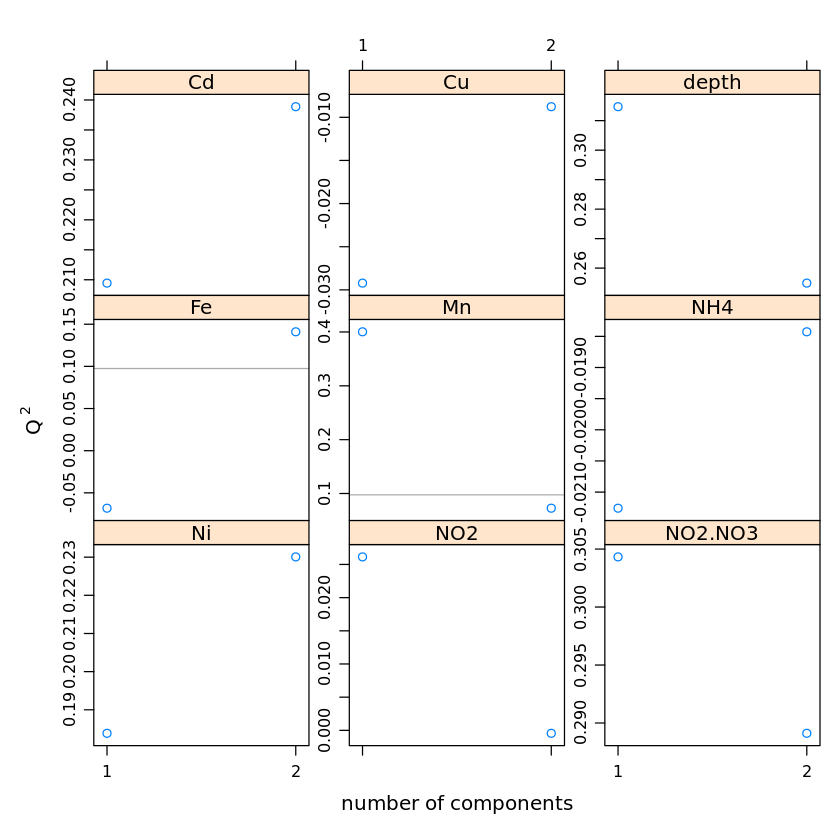

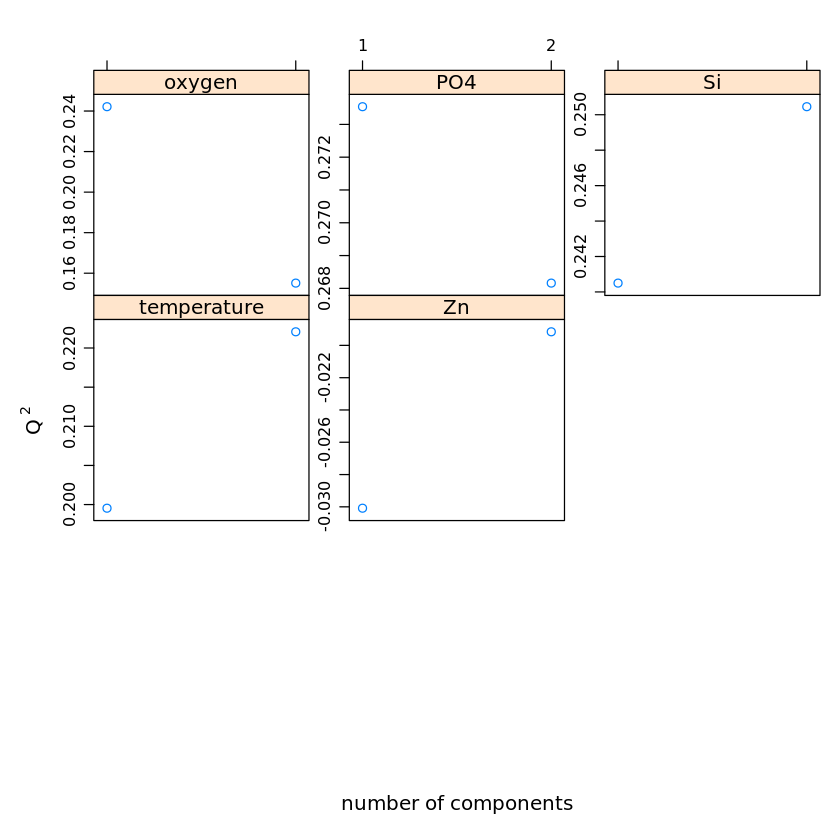

In [47]:
plot(result.val, criterion  = 'Q2')
# try multiple components, here ncomp = 2 is enough

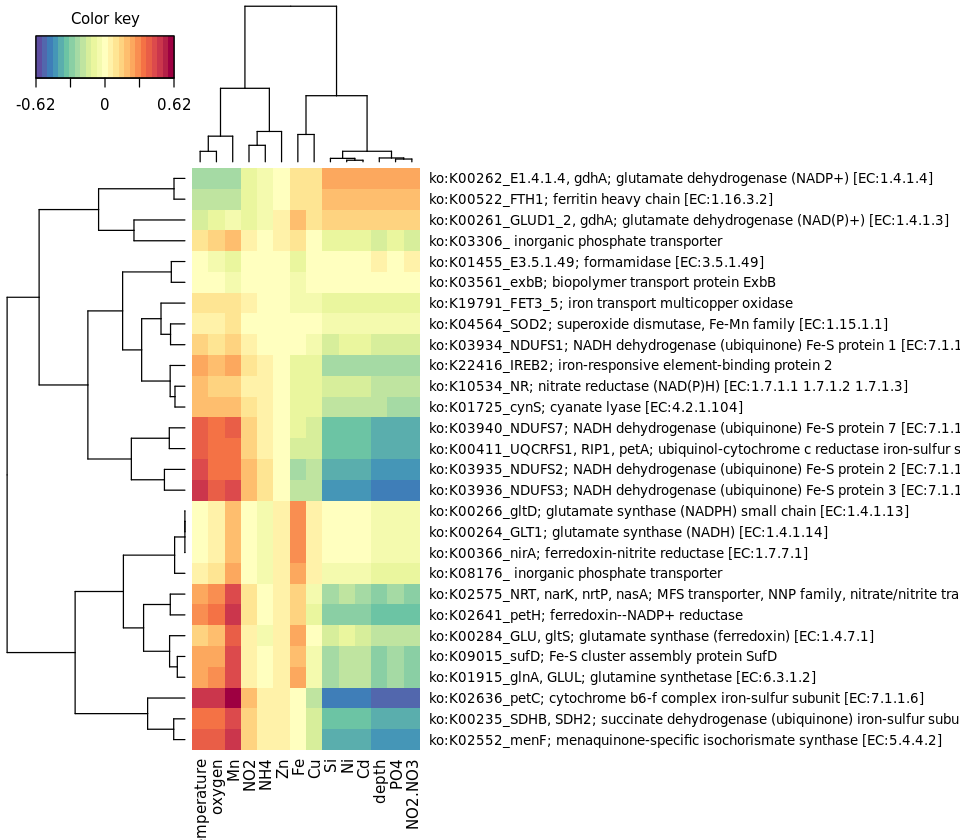

In [54]:
options(repr.plot.width = 8, repr.plot.height = 7)
cim(result, margins = c(5,30))

temperature 
ko:K02552_menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]                          0.409042385
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]       0.358641099
ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]                          0.514893945
ko:K01915_glnA, GLUL; glutamine synthetase [EC:6.3.1.2]                                           0.235309234
ko:K09015_sufD; Fe-S cluster assembly protein SufD                                                0.232925699
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                                 0.157529905
ko:K02641_petH; ferredoxin--NADP+ reductase                                                       0.312015720
ko:K02575_NRT, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter         0.248042372
ko:K08176_ inorganic phosphate transporter                                                        0.064671588
ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]                                         0.011409252
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                           0.011409252
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                              0.011409252
ko:K03936_NDUFS3; NADH dehydrogenase (ubiquinone) Fe-S protein 3 [EC:7.1.1.2 1.6.99.3]            0.471107773
ko:K03935_NDUFS2; NADH dehydrogenase (ubiquinone) Fe-S protein 2 [EC:7.1.1.2 1.6.99.3]            0.424261633
ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8]  0.376002971
ko:K03940_NDUFS7; NADH dehydrogenase (ubiquinone) Fe-S protein 7 [EC:7.1.1.2 1.6.99.3]            0.371446411
ko:K01725_cynS; cyanate lyase [EC:4.2.1.104]                                                      0.221068683
ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3]                            0.175985251
ko:K22416_IREB2; iron-responsive element-binding protein 2                                        0.248691497
ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3]            0.128372110
ko:K04564_SOD2; superoxide dismutase, Fe-Mn family [EC:1.15.1.1]                                  0.054102036
ko:K19791_FET3_5; iron transport multicopper oxidase                                              0.103016169
ko:K03561_exbB; biopolymer transport protein ExbB                                                 0.007247119
ko:K01455_E3.5.1.49; formamidase [EC:3.5.1.49]                                                   -0.017288662
ko:K03306_ inorganic phosphate transporter                                                        0.107238330
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                          -0.157282748
ko:K00522_FTH1; ferritin heavy chain [EC:1.16.3.2]                                               -0.209346801
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                           -0.258330734
                                                                                                 oxygen      
ko:K02552_menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]                          0.390811370
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]       0.342920152
ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]                          0.493692825
ko:K01915_glnA, GLUL; glutamine synthetase [EC:6.3.1.2]                                           0.273402607
ko:K09015_sufD; Fe-S cluster assembly protein SufD                                                0.267604147
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                                 0.202075018
ko:K02641_petH; ferredoxin--NADP+ reductase                                                       0.326687172
ko:K02575_NRT, narK, nrtP, 

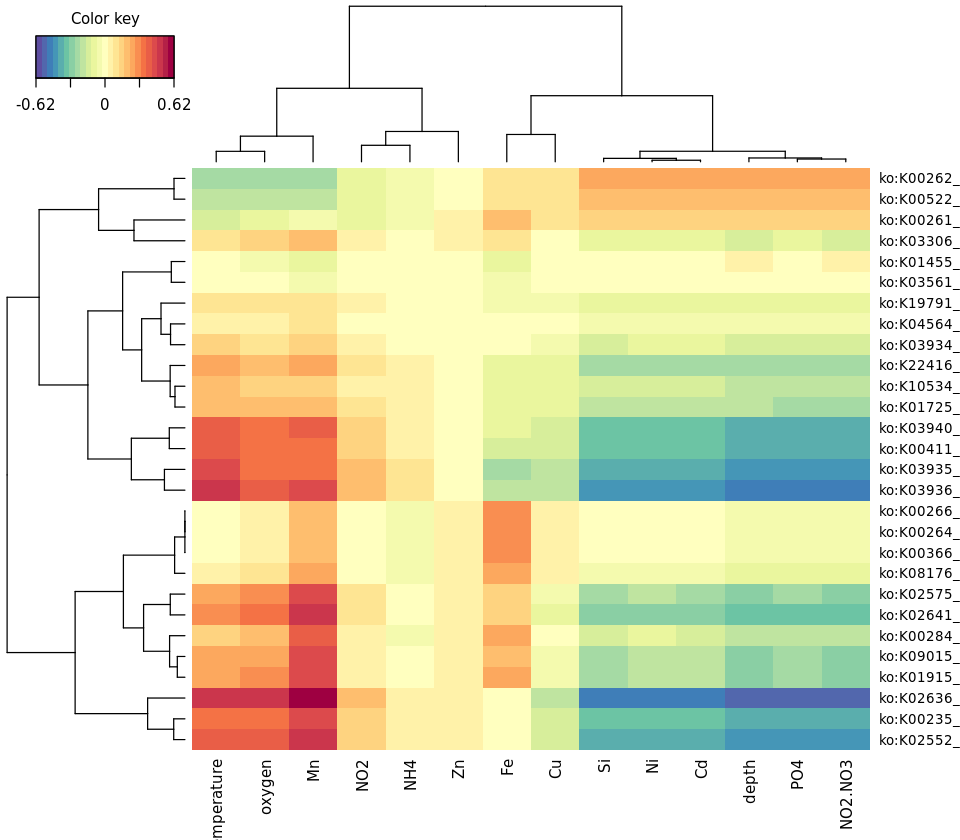

In [55]:
cim<-cim(result)
cim$mat #correlation matrix

In [56]:
cim<-as.data.frame(as.matrix(cim$mat))

In [57]:
cim$KO_def<-rownames(cim)
g<-merge(cim, gois, by='KO_def')
rownames(g)<-g$KO_def

In [58]:
annotation <- data.frame(Class = g$id)
rownames(annotation)<-rownames(g)

In [60]:
g<-g[,-18]
g<-g[,-17]
g<-g[,-16]
g<-g[,-1]
head(g)

temperature
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.35864110
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     -0.15728275
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.25833073
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                      0.01140925
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                         0.01140925
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                            0.15752991
                                                                                            oxygen     
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.34292015
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     -0.11295368
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.22620784
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                      0.06740062
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                         0.06740062
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                            0.20207502
                                                                                            Mn         
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.42768204
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     -0.05053445
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.23192807
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                      0.22038805
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                         0.22038805
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                            0.37618548
                                                                                            NO2        
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.13629813
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     -0.07603792
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.10721263
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     -0.02020773
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        -0.02020773
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                            0.03751422
                                                                                            NH4        
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.04822822
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     -0.05758741
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.05498365
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     -0.05345151
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        -0.05345151
ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           -0.02889523
                                                                                            Zn          
ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]  0.032261628
ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                      0.025370867
ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      -0.001280906
ko:K00264_GLT1; glutamate syntha

In [61]:
options(repr.plot.width = 14, repr.plot.height = 8)

In [62]:
library(viridis)
library(pheatmap)

Loading required package: viridisLite



In [63]:
newCols <- colorRampPalette(grDevices::rainbow(length(unique(annotation$Class))))
mycolors <- newCols(length(unique(annotation$Class)))
names(mycolors) <- unique(annotation$Class)
mycolors <- list(Class = mycolors)
mycolors = list("Class"=c('iron'='#ff855c','nitrogen'='#d199ff','nickel'='#7dfffd','phosphorus'='#a7ff78','carbon'='#ff6bd3','siderophore'='#6b70ff','divalent metal'='#ffe4b5','manganese'='#ff6395','zinc'='#45b8ff','transcription factor'='#92b3a0','copper'='#fff266'))

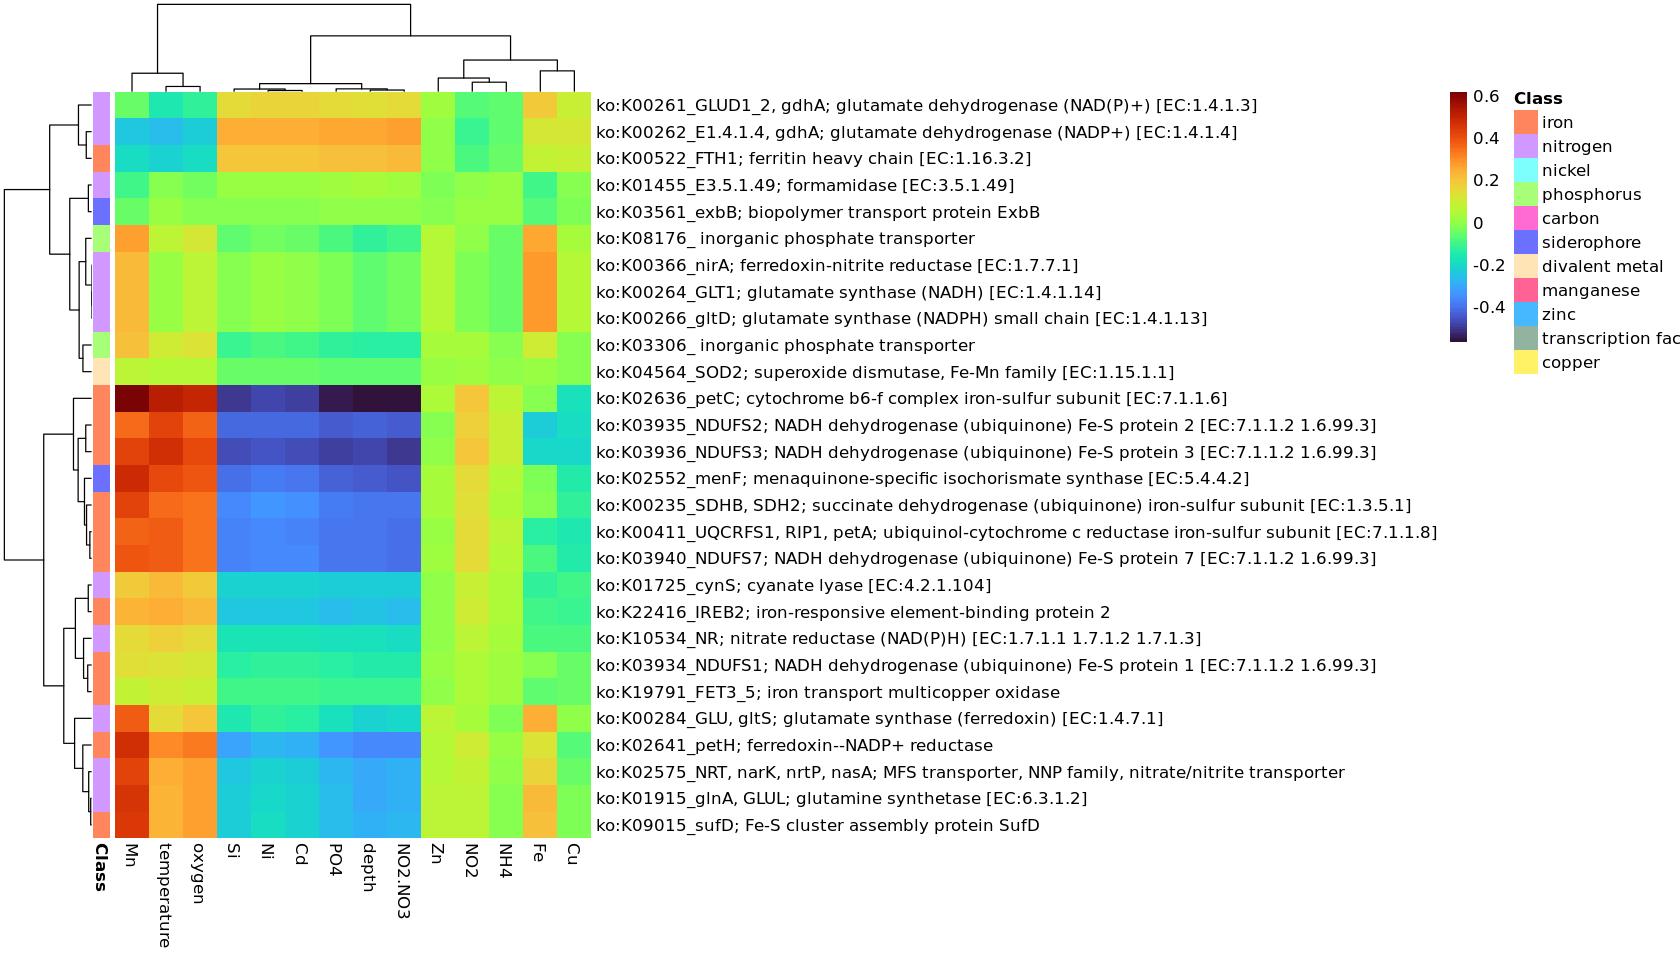

In [64]:
myColor <- viridis_pal(option = "turbo")(100)
pheatmap(mat = g[,-15], annotation_row = annotation, color = myColor, cluster_rows=T, annotation_colors = mycolors)

In [65]:
setEPS()
postscript("pls.proteins.eps")
plot(rnorm(100), main="PLS.proteins")
dev.off()

png 
  2

In [56]:
#For pulling out individual proteins of interest
Euk<-c('Eukaryota')
sub<-subset1[subset1$domain %in% Euk,]
GOI<-c('ko:K04752','ko:K03594','ko:K02040','ko:K03832','ko:K02014','ko:K01113','ko:K02193','ko:K02364','ko:K02016','ko:K04751','ko:K02013','ko:K03594','ko:K04561','ko:K04755','ko:K04565','ko:K016627','ko:K08176','ko:K19791','ko:K07243','ko:K03306')
#GOI<-c('ko:K03594','ko:K02040')
sub1<-sub[sub$KEGG_ko %in% GOI,]
head(sub1)

transcript_name                   class            KEGG_ko   domain   
1 megahit_HN011_k141_54013.p1        Prasinococcales ko:K02040 Eukaryota
2 megahit_HN012_k141_36464.p1        Dinophyceae     ko:K02040 Eukaryota
3 megahit_HN015_k141_115428.p1       Bacillariophyta ko:K02014 Eukaryota
4 megahit_HN021_k141_57564.p1        Dinophyceae     ko:K02040 Eukaryota
5 transabyss_HN006_.k50R4819259.p1   Prasinococcales ko:K02040 Eukaryota
6 transabyss_HN015_.k110R1005244.p2  Pelagophyceae   ko:K03306 Eukaryota
  division         1_30_0.2 1_115_0.2 1_30_3    1_115_3 1_150 ⋯ 7_300    
1  Chlorophyta     0        0         0.1386285 0       0     ⋯ 0.0000000
2  Dinophyta       0        0         0.0000000 0       0     ⋯ 0.0000000
3  Stramenopiles_X 0        0         0.0000000 0       0     ⋯ 0.1263283
4  Dinophyta       0        0         0.0000000 0       0     ⋯ 0.0000000
5  Chlorophyta     0        0         0.1378785 0       0     ⋯ 0.0000000
6  Stramenopiles_X 0        0         0.0000000 0       0     ⋯ 0.0000000
  8_20       8_40 8_120     8_175      8_400 8_800      8_250      8_600      X
1 0.00000000 0    0.0000000 0.00000000 0     0.00000000 0.00000000 0.00000000 0
2 0.00000000 0    0.0000000 0.00000000 0     0.00000000 0.00000000 0.00000000 0
3 0.01946906 0    0.0318142 0.02896704 0     0.02865526 0.04338542 0.08276417 0
4 0.00000000 0    0.0000000 0.00000000 0     0.00000000 0.00000000 0.00000000 0
5 0.00000000 0    0.0000000 0.00000000 0     0.00000000 0.00000000 0.00000000 0
6 0.00000000 0    0.0000000 0.00000000 0     0.00000000 0.00000000 0.00000000 0

In [57]:
library(caroline)
write.csv(sub1, 'proteins_LCA3%_RefSeq_review.csv')

In [90]:
GOI<-c('ko:K02014','ko:K02040')
sub1<-sub[sub$KEGG_ko %in% GOI,]
head(sub1)

transcript_name              class            KEGG_ko   domain   
1 megahit_HN006_k141_532021.p1  Bacillariophyta ko:K02014 Eukaryota
2 megahit_HN011_k141_187643.p1  Bacillariophyta ko:K02014 Eukaryota
3 megahit_HN011_k141_54013.p1   Prasinococcales ko:K02040 Eukaryota
4 megahit_HN012_k141_36464.p1   Dinophyceae     ko:K02040 Eukaryota
5 megahit_HN015_k141_115428.p1  Bacillariophyta ko:K02014 Eukaryota
6 megahit_HN021_k141_57564.p1   Dinophyceae     ko:K02040 Eukaryota
  division         2_60       2_90      2_120     2_150 3_10       3_20      
1  Stramenopiles_X 0.05084287 0.0000000 0.0000000 0     0.13769419 0.17509197
2  Stramenopiles_X 0.00000000 0.0000000 0.0000000 0     0.04574733 0.02379777
3  Chlorophyta     0.02158156 0.0000000 0.0000000 0     0.00000000 0.04053941
4  Dinophyta       0.02826156 0.0000000 0.0000000 0     0.00000000 0.00000000
5  Stramenopiles_X 0.00000000 0.0149068 0.0165628 0     0.00000000 0.00000000
6  Dinophyta       0.00000000 0.0000000 0.0000000 0     0.00000000 0.00000000
  3_30       3_45       3_60      3_75       3_90       3_105      3_120    
1 0.12046107 0.16112925 0.1404403 0.06605044 0.08844316 0.00000000 0.0000000
2 0.02572831 0.02409001 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
3 0.04382809 0.02735817 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
4 0.00000000 0.00000000 0.1040870 0.00000000 0.00000000 0.00000000 0.0000000
5 0.02231986 0.02089860 0.0000000 0.02141700 0.01911859 0.03649207 0.0414806
6 0.00000000 0.00000000 0.0000000 0.00000000 0.15165253 0.00000000 0.0000000
  3_150     3_200     3_400     3_600      3_1000     3_1200     7_20     
1 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000 0.1154739
2 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
3 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
4 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
5 0.0262021 0.1293199 0.1409067 0.03411858 0.06935549 0.03442248 0.0000000
6 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000 0.0000000
  7_40     7_70       7_108 7_112_A 7_112_B 7_117 7_122     7_700     
1 0.140754 0.13055377 0     0       0       0     0.0000000 0.00000000
2 0.000000 0.00000000 0     0       0       0     0.0000000 0.00000000
3 0.000000 0.02216675 0     0       0       0     0.0000000 0.00000000
4 0.000000 0.00000000 0     0       0       0     0.0000000 0.00000000
5 0.000000 0.00000000 0     0       0       0     0.1377299 0.05775505
6 0.000000 0.00000000 0     0       0       0     0.0000000 0.00000000
  8_20       8_40 8_120      8_175      8_400 8_800      X
1 0.04095103 0    0.00000000 0.00000000 0     0.00000000 0
2 0.00000000 0    0.00000000 0.00000000 0     0.00000000 0
3 0.00000000 0    0.00000000 0.00000000 0     0.00000000 0
4 0.00000000 0    0.00000000 0.00000000 0     0.00000000 0
5 0.01770461 0    0.02927714 0.02661022 0     0.02645103 0
6 0.00000000 0    0.00000000 0.00000000 0     0.00000000 0

# Transcripts and proteins correlation

In [69]:
tr<-read.csv('transcripts.goi.pls.csv') #read in TPM transcripts collapsed at the target KEGG genes level

In [70]:
rownames(tr)<-tr$X
tr<-tr[,-1]

In [71]:
colnames(tr)<-gsub('X','',colnames(tr))
tr$def<-rownames(tr)

In [72]:
tr.t<-t(tr)
tr.t<-as.data.frame(tr.t)

In [73]:
t.e<-X #proteins from above
t.e<-as.data.frame(t.e)

In [74]:
colnames(tr.t)<-paste('TRANS',colnames(tr.t),sep='_')
tr.t$ID<-rownames(tr.t)
colnames(t.e)<-paste('PROT',colnames(t.e),sep='_')
t.e$ID<-rownames(t.e)

In [75]:
tail(tr.t)

TRANS_ko:K00184_K00184; prokaryotic molybdopterin-containing oxidoreductase family, iron-sulfur binding subunit
5_400  7.761567                                                                                                      
5_880  0.000000                                                                                                      
6_20    0.000000                                                                                                     
6_110  0.000000                                                                                                      
6_200  0.000000                                                                                                      
def   ko:K00184_K00184; prokaryotic molybdopterin-containing oxidoreductase family, iron-sulfur binding subunit      
      TRANS_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]
5_400 10.344579                                                                                        
5_880  4.659019                                                                                        
6_20   48.377340                                                                                       
6_110 10.957971                                                                                        
6_200  8.632918                                                                                        
def   ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]      
      TRANS_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]
5_400  6.240242                                                                    
5_880  3.430040                                                                    
6_20    1.220283                                                                   
6_110  0.000000                                                                    
6_200  0.000000                                                                    
def   ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]      
      TRANS_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]
5_400  6.129194                                                                   
5_880  4.595491                                                                   
6_20    5.399992                                                                  
6_110  4.074776                                                                   
6_200  0.000000                                                                   
def   ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]      
      TRANS_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]
5_400  2.291676                                                    
5_880  5.662327                                                    
6_20   24.876493                                                   
6_110 23.137706                                                    
6_200  1.519623                                                    
def   ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]      
      TRANS_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]
5_400  0.157662                                                                 
5_880  2.548370                                                                 
6_20   11.977108                                                                
6_110 21.597302                                                                 
6_200  0.601210                                                                 
def   ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]      
      TRANS_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]
5_400  0.000000                                                              
5_880  1.806449                                                              
6_20  

In [76]:
tr.t<-tr.t[-81,]
#tr.t<-tr.t[-46,]
t.e<-t.e[-36,]
t.e<-t.e[, colSums(t.e != 0) > 0] #remove columns that sum to 0
t.e<-t.e[apply(t.e[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0
tr.t<-tr.t[, colSums(t.e != 0) > 0] #remove columns that sum to 0
tr.t<-tr.t[apply(tr.t[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0

In [77]:
f<-merge(tr.t, t.e, by='ID')

In [78]:
rownames(f)<-f$ID
f<-f[,-1]

In [79]:
f<-f %>% mutate_if(is.character,as.numeric)

In [80]:
X = f[1:80]
Y = f[81:108]

In [81]:
X<-X[,-26]
X<-X[,-29]
head(X)

TRANS_ko:K00184_K00184; prokaryotic molybdopterin-containing oxidoreductase family, iron-sulfur binding subunit
1_115_0.2 0.000000                                                                                                       
1_115_3   0.000000                                                                                                       
1_200     2.665243                                                                                                       
1_30_0.2  0.000000                                                                                                       
1_30_3    0.000000                                                                                                       
1_400     0.000000                                                                                                       
          TRANS_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]
1_115_0.2 12.434464                                                                                        
1_115_3   25.958395                                                                                        
1_200      0.836569                                                                                        
1_30_0.2  31.238807                                                                                        
1_30_3    51.834229                                                                                        
1_400      2.287436                                                                                        
          TRANS_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]
1_115_0.2 16.740308                                                                    
1_115_3    9.954099                                                                    
1_200      2.214870                                                                    
1_30_0.2   3.229894                                                                    
1_30_3     5.527975                                                                    
1_400     11.659346                                                                    
          TRANS_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]
1_115_0.2 0.719580                                                                    
1_115_3   6.089637                                                                    
1_200     0.149005                                                                    
1_30_0.2  1.193660                                                                    
1_30_3    4.438091                                                                    
1_400     8.643217                                                                    
          TRANS_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]
1_115_0.2 12.050875                                                    
1_115_3    9.558340                                                    
1_200      0.043177                                                    
1_30_0.2  16.210254                                                    
1_30_3    17.834628                                                    
1_400      3.852353                                                    
          TRANS_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]
1_115_0.2 5.688820                                                                  
1_115_3   5.037432                                                                  
1_200     0.043177                                                                  
1_30_0.2  5.566838                                                                  
1_30_3    7.358607                                                                  
1_400     0.178604                                                                  
          TRANS_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4

In [82]:
result <- pls(X, Y, ncomp = 2, mode = "regression")

In [83]:
result


Call:
 pls(X = X, Y = Y, ncomp = 2, mode = "regression") 

 PLS with a 'regression' mode with 2 PLS components. 
 You entered data X of dimensions: 36 78 
 You entered data Y of dimensions: 36 28 

 No variable selection. 

 Main numerical outputs: 
 -------------------- 
 loading vectors: see object$loadings 
 variates: see object$variates 
 variable names: see object$names 

 Functions to visualise samples: 
 -------------------- 
 plotIndiv, plotArrow 

 Functions to visualise variables: 
 -------------------- 
 plotVar, plotLoadings, network, cim 

In [84]:
result.val <- perf(result, validation = "loo")
#plot(result.val, criterion  = 'Q2')
result.val$MSEP

Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”
Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”
Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”
Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”
Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”
Warning message in cor(A[[k]], variates.A[[k]]):
“the standard deviation is zero”


1 comp   
PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]      0.9775486
PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                          0.9971097
PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                           1.0379437
PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                          1.0573074
PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                             1.0573074
PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                                1.0573074
PROT_ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]                                        1.0573074
PROT_ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8] 1.0904818
PROT_ko:K00522_FTH1; ferritin heavy chain [EC:1.16.3.2]                                               1.0336114
PROT_ko:K01455_E3.5.1.49; formamidase [EC:3.5.1.49]                                                   0.9930245
PROT_ko:K01725_cynS; cyanate lyase [EC:4.2.1.104]                                                     1.1032543
PROT_ko:K01915_glnA, GLUL; glutamine synthetase [EC:6.3.1.2]                                          1.0531720
PROT_ko:K02552_menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]                         0.9647708
PROT_ko:K02575_NRT, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter        1.0811117
PROT_ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]                         0.9410130
PROT_ko:K02641_petH; ferredoxin--NADP+ reductase                                                      1.0529399
PROT_ko:K03306_ inorganic phosphate transporter                                                       1.0578869
PROT_ko:K03561_exbB; biopolymer transport protein ExbB                                                1.0396429
PROT_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3]           1.2049846
PROT_ko:K03935_NDUFS2; NADH dehydrogenase (ubiquinone) Fe-S protein 2 [EC:7.1.1.2 1.6.99.3]           0.5960587
PROT_ko:K03936_NDUFS3; NADH dehydrogenase (ubiquinone) Fe-S protein 3 [EC:7.1.1.2 1.6.99.3]           0.7141400
PROT_ko:K03940_NDUFS7; NADH dehydrogenase (ubiquinone) Fe-S protein 7 [EC:7.1.1.2 1.6.99.3]           0.9391053
PROT_ko:K04564_SOD2; superoxide dismutase, Fe-Mn family [EC:1.15.1.1]                                 1.0349006
PROT_ko:K08176_ inorganic phosphate transporter                                                       1.0655666
PROT_ko:K09015_sufD; Fe-S cluster assembly protein SufD                                               1.0722567
PROT_ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3]                           1.0522836
PROT_ko:K19791_FET3_5; iron transport multicopper oxidase                                             1.0300314
PROT_ko:K22416_IREB2; iron-responsive element-binding protein 2                                       1.2735395
                                                                                                      2 comp   
PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]      0.9660084
PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                          1.4936693
PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                           1.1454660
PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                          1.1123109
PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                             1.1123109
PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                                1.1123109
PROT_ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]        

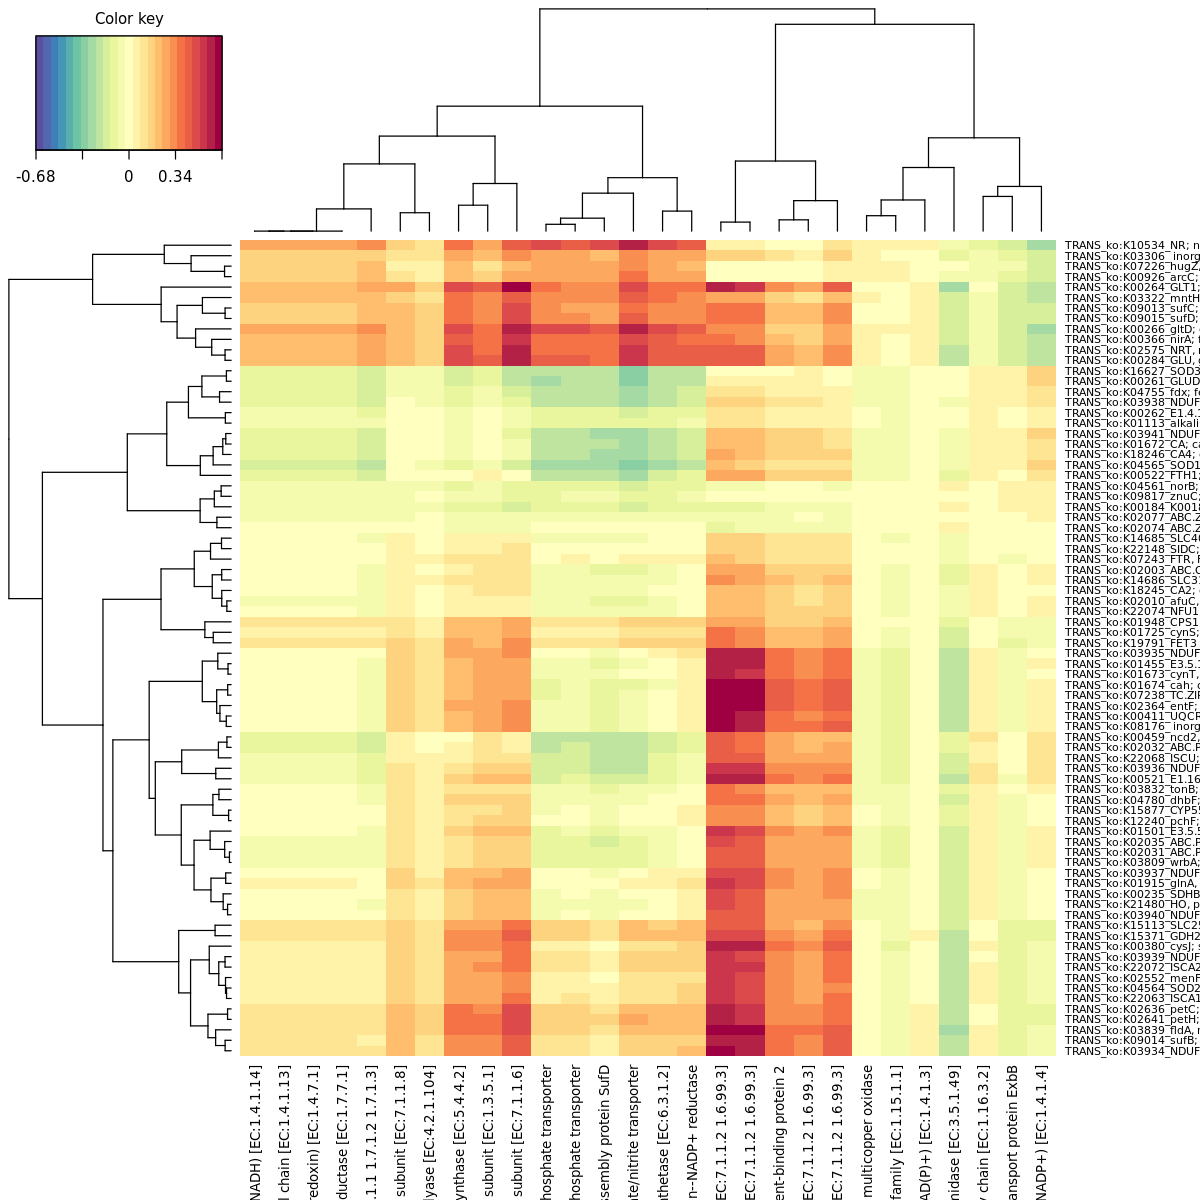

In [85]:
options(repr.plot.width = 10, repr.plot.height = 10)
cim(result, margins = c(8,8))

PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]
TRANS_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3]                     0.0953461831                                               
TRANS_ko:K09014_sufB; Fe-S cluster assembly protein SufB                                                         0.0845810869                                               
TRANS_ko:K03839_fldA, nifF, isiB; flavodoxin I                                                                   0.1053394790                                               
TRANS_ko:K02641_petH; ferredoxin--NADP+ reductase                                                                0.1217022228                                               
TRANS_ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]                                   0.1153031504                                               
TRANS_ko:K22063_ISCA1; iron-sulfur cluster assembly 1                                                            0.0650849447                                               
TRANS_ko:K04564_SOD2; superoxide dismutase, Fe-Mn family [EC:1.15.1.1]                                           0.0579239333                                               
TRANS_ko:K02552_menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]                                   0.0561004165                                               
TRANS_ko:K22072_ISCA2; iron-sulfur cluster assembly 2                                                            0.0744286304                                               
TRANS_ko:K03939_NDUFS6; NADH dehydrogenase (ubiquinone) Fe-S protein 6                                           0.0771728308                                               
TRANS_ko:K00380_cysJ; sulfite reductase (NADPH) flavoprotein alpha-component [EC:1.8.1.2]                        0.0605320441                                               
TRANS_ko:K15371_GDH2; glutamate dehydrogenase [EC:1.4.1.2]                                                       0.1058161119                                               
TRANS_ko:K15113_SLC25A28_37, MFRN; solute carrier family 25 (mitochondrial iron transporter), member 28/37       0.0974338106                                               
TRANS_ko:K03940_NDUFS7; NADH dehydrogenase (ubiquinone) Fe-S protein 7 [EC:7.1.1.2 1.6.99.3]                     0.0037769996                                               
TRANS_ko:K21480_HO, pbsA1, hmuO; heme oxygenase (biliverdin-producing, ferredoxin) [EC:1.14.15.20]              -0.0001722299                                               
TRANS_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]                0.0031129119                                               
TRANS_ko:K01915_glnA, GLUL; glutamine synthetase [EC:6.3.1.2]                                                    0.0294560340                                               
TRANS_ko:K03937_NDUFS4; NADH dehydrogenase (ubiquinone) Fe-S protein 4                                           0.0224475350                                               
TRANS_ko:K03809_wrbA; NAD(P)H dehydrogenase (quinone) [EC:1.6.5.2]                                              -0.0311508997                                               
TRANS_ko:K02031_ABC.PE.A; peptide/nickel transport system ATP-binding protein                                   -0.0336671809                                               
TRANS_ko:K02035_ABC.PE.S; peptide/nickel transport system substrate-binding protein                             -0.0364807478                                               
TRANS_ko:K01501_E3.5.5.1; nitrilase [EC:3.5.5.1]                                                                -0.0181450043                                               
TRANS_ko:K12240_pchF; pyochelin synthetase                                                                       0.0051650292        

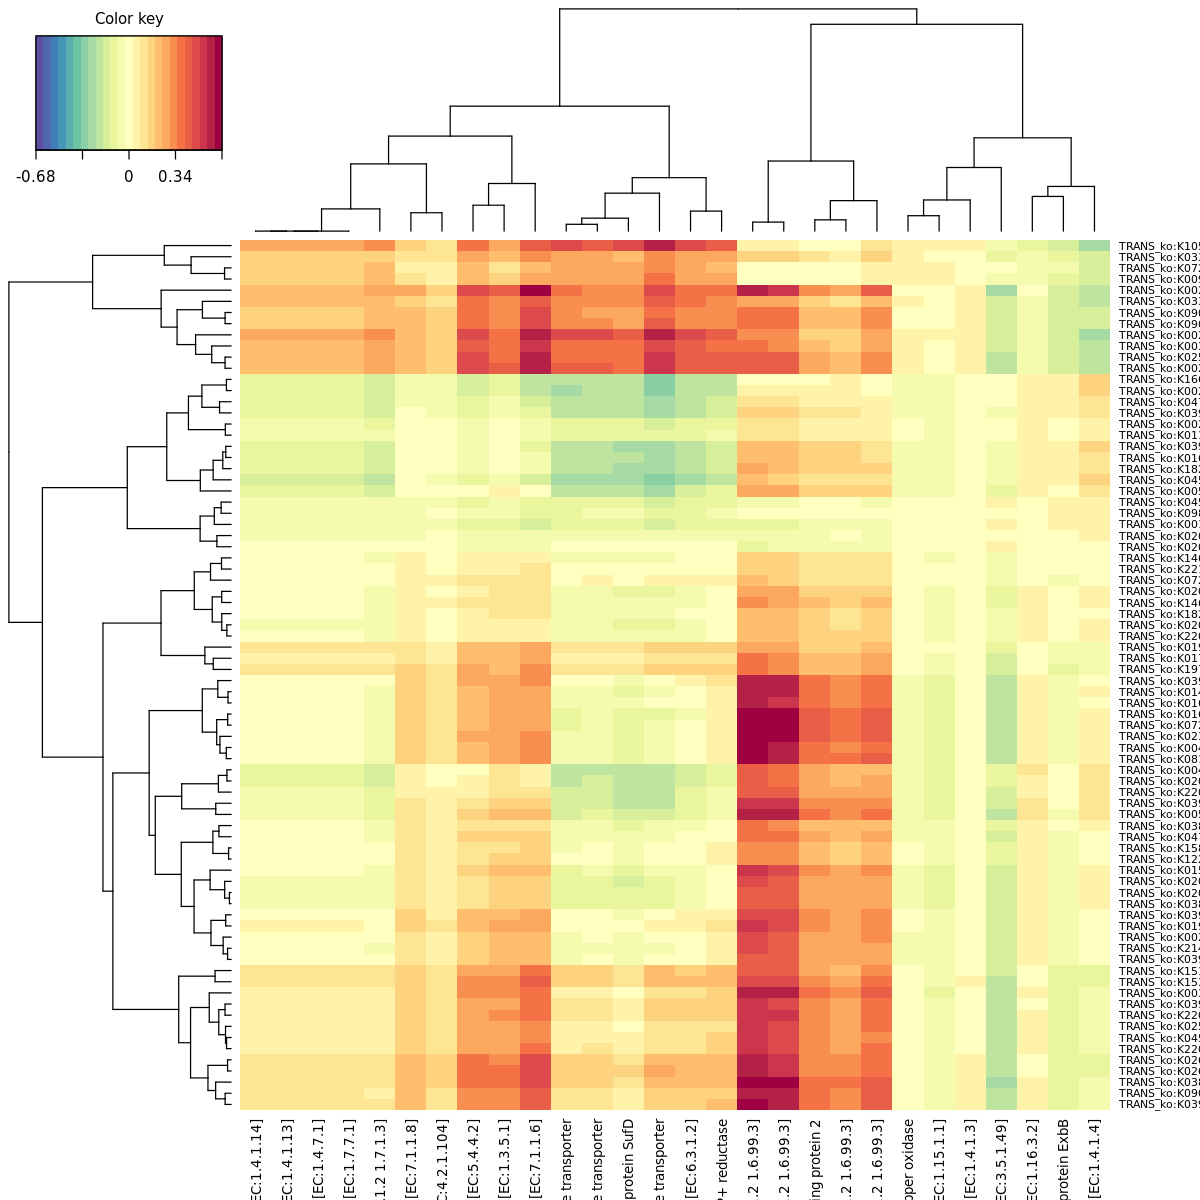

In [86]:
cim<-cim(result)
cim$mat 

In [87]:
cim<-as.data.frame(as.matrix(cim$mat))
cim$KO_def<-rownames(cim)
#g<-merge(cim, gois, by='KO_def')
#rownames(g)<-g$KO_def

In [88]:
head(cim)

PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]
TRANS_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3] 0.09534618                                                  
TRANS_ko:K09014_sufB; Fe-S cluster assembly protein SufB                                     0.08458109                                                  
TRANS_ko:K03839_fldA, nifF, isiB; flavodoxin I                                               0.10533948                                                  
TRANS_ko:K02641_petH; ferredoxin--NADP+ reductase                                            0.12170222                                                  
TRANS_ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]               0.11530315                                                  
TRANS_ko:K22063_ISCA1; iron-sulfur cluster assembly 1                                        0.06508494                                                  
                                                                                             PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]
TRANS_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3] 0.09534618                                                               
TRANS_ko:K09014_sufB; Fe-S cluster assembly protein SufB                                     0.08458109                                                               
TRANS_ko:K03839_fldA, nifF, isiB; flavodoxin I                                               0.10533948                                                               
TRANS_ko:K02641_petH; ferredoxin--NADP+ reductase                                            0.12170222                                                               
TRANS_ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]               0.11530315                                                               
TRANS_ko:K22063_ISCA1; iron-sulfur cluster assembly 1                                        0.06508494                                                               
                                                                                             PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]
TRANS_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3] 0.09534618                                                            
TRANS_ko:K09014_sufB; Fe-S cluster assembly protein SufB                                     0.08458109                                                            
TRANS_ko:K03839_fldA, nifF, isiB; flavodoxin I                                               0.10533948                                                            
TRANS_ko:K02641_petH; ferredoxin--NADP+ reductase                                            0.12170222                                                            
TRANS_ko:K02636_petC; cytochrome b6-f complex iron-sulfur subunit [EC:7.1.1.6]               0.11530315                                                            
TRANS_ko:K22063_ISCA1; iron-sulfur cluster assembly 1                                        0.06508494                                                            
                                                                                             PROT_ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]
TRANS_ko:K03934_NDUFS1; NADH dehydrogenase (ubiquinone) Fe-S protein 1 [EC:7.1.1.2 1.6.99.3] 0.09534618                                                    
TRANS_ko:K09014_sufB; Fe-S cluster assembly protein SufB                                     0.08458109                                                    
TRANS_ko:K03839_fldA, nifF, isiB; flavodoxin I                                               0.10533948                                                    
TRANS_ko:K02641_petH; ferredoxin--NADP+ reductase                         

In [89]:
cim<-cim[,-29]

In [90]:
library(viridis)
library(pheatmap)
options(repr.plot.width = 15, repr.plot.height = 25)

In [91]:
annot<-as.data.frame(colnames(cim))
colnames(annot)<-c('KO_def')
annot$original<-annot$KO_def
annot$KO_def<-gsub('PROT_','',annot$KO_def)
head(annot)

KO_def                                                                                          
1 ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                         
2 ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                            
3 ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                               
4 ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]                                       
5 ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3]                          
6 ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8]
  original                                                                                             
1 PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                         
2 PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                            
3 PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                               
4 PROT_ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1]                                       
5 PROT_ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3]                          
6 PROT_ko:K00411_UQCRFS1, RIP1, petA; ubiquinol-cytochrome c reductase iron-sulfur subunit [EC:7.1.1.8]

In [92]:
annot.t<-as.data.frame(rownames(cim))
colnames(annot.t)<-c('KO_def')
annot.t$original<-annot.t$KO_def
annot.t$KO_def<-gsub('TRANS_','',annot.t$KO_def)

In [93]:
prot<-merge(gois, annot,by='KO_def')
prot<-prot[,3:5]
rownames(prot)<-prot$original
prot<-as.data.frame(prot)
colnames(prot)<-c('def','Class','original')
head(prot)

def                                                                              
PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]
PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                    
PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                     
PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                    
PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                       
PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                          
                                                                                                 Class   
PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] iron    
PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     nitrogen
PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      nitrogen
PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     nitrogen
PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        nitrogen
PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           nitrogen
                                                                                                 original                                                                                        
PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1] PROT_ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]
PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                     PROT_ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]                    
PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                      PROT_ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]                     
PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                     PROT_ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14]                                    
PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                        PROT_ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13]                       
PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]                           PROT_ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]

In [94]:
trans<-merge(gois, annot.t,by='KO_def')
trans<-trans[,3:5]
rownames(trans)<-trans$original
trans<-as.data.frame(trans)
colnames(trans)<-c('def','Class','original')

In [95]:
annotation.t <- data.frame(Class = trans$Class)
rownames(annotation.t)<-trans$original
newCols <- colorRampPalette(grDevices::rainbow(length(unique(annotation.t$Class))))
mycolors <- newCols(length(unique(annotation.t$Class)))
names(mycolors) <- unique(annotation.t$Class)


annotation <- data.frame(Class = prot$Class)
rownames(annotation)<-prot$original
newCols <- colorRampPalette(grDevices::rainbow(length(unique(annotation$Class))))
mycolors <- newCols(length(unique(annotation$Class)))
names(mycolors) <- unique(annotation$Class)
#mycolors <- list(Class = mycolors)
mycolors = list("Class"=c('iron'='#ff855c','nitrogen'='#d199ff','nickel'='#7dfffd','phosphorus'='#a7ff78','carbon'='#ff6bd3','siderophore'='#6b70ff','divalent metal'='#ffe4b5','manganese'='#ff6395','zinc'='#45b8ff','transcription factor'='#92b3a0','copper'='#fff266'))

In [96]:
options(repr.plot.width = 20, repr.plot.height = 26)

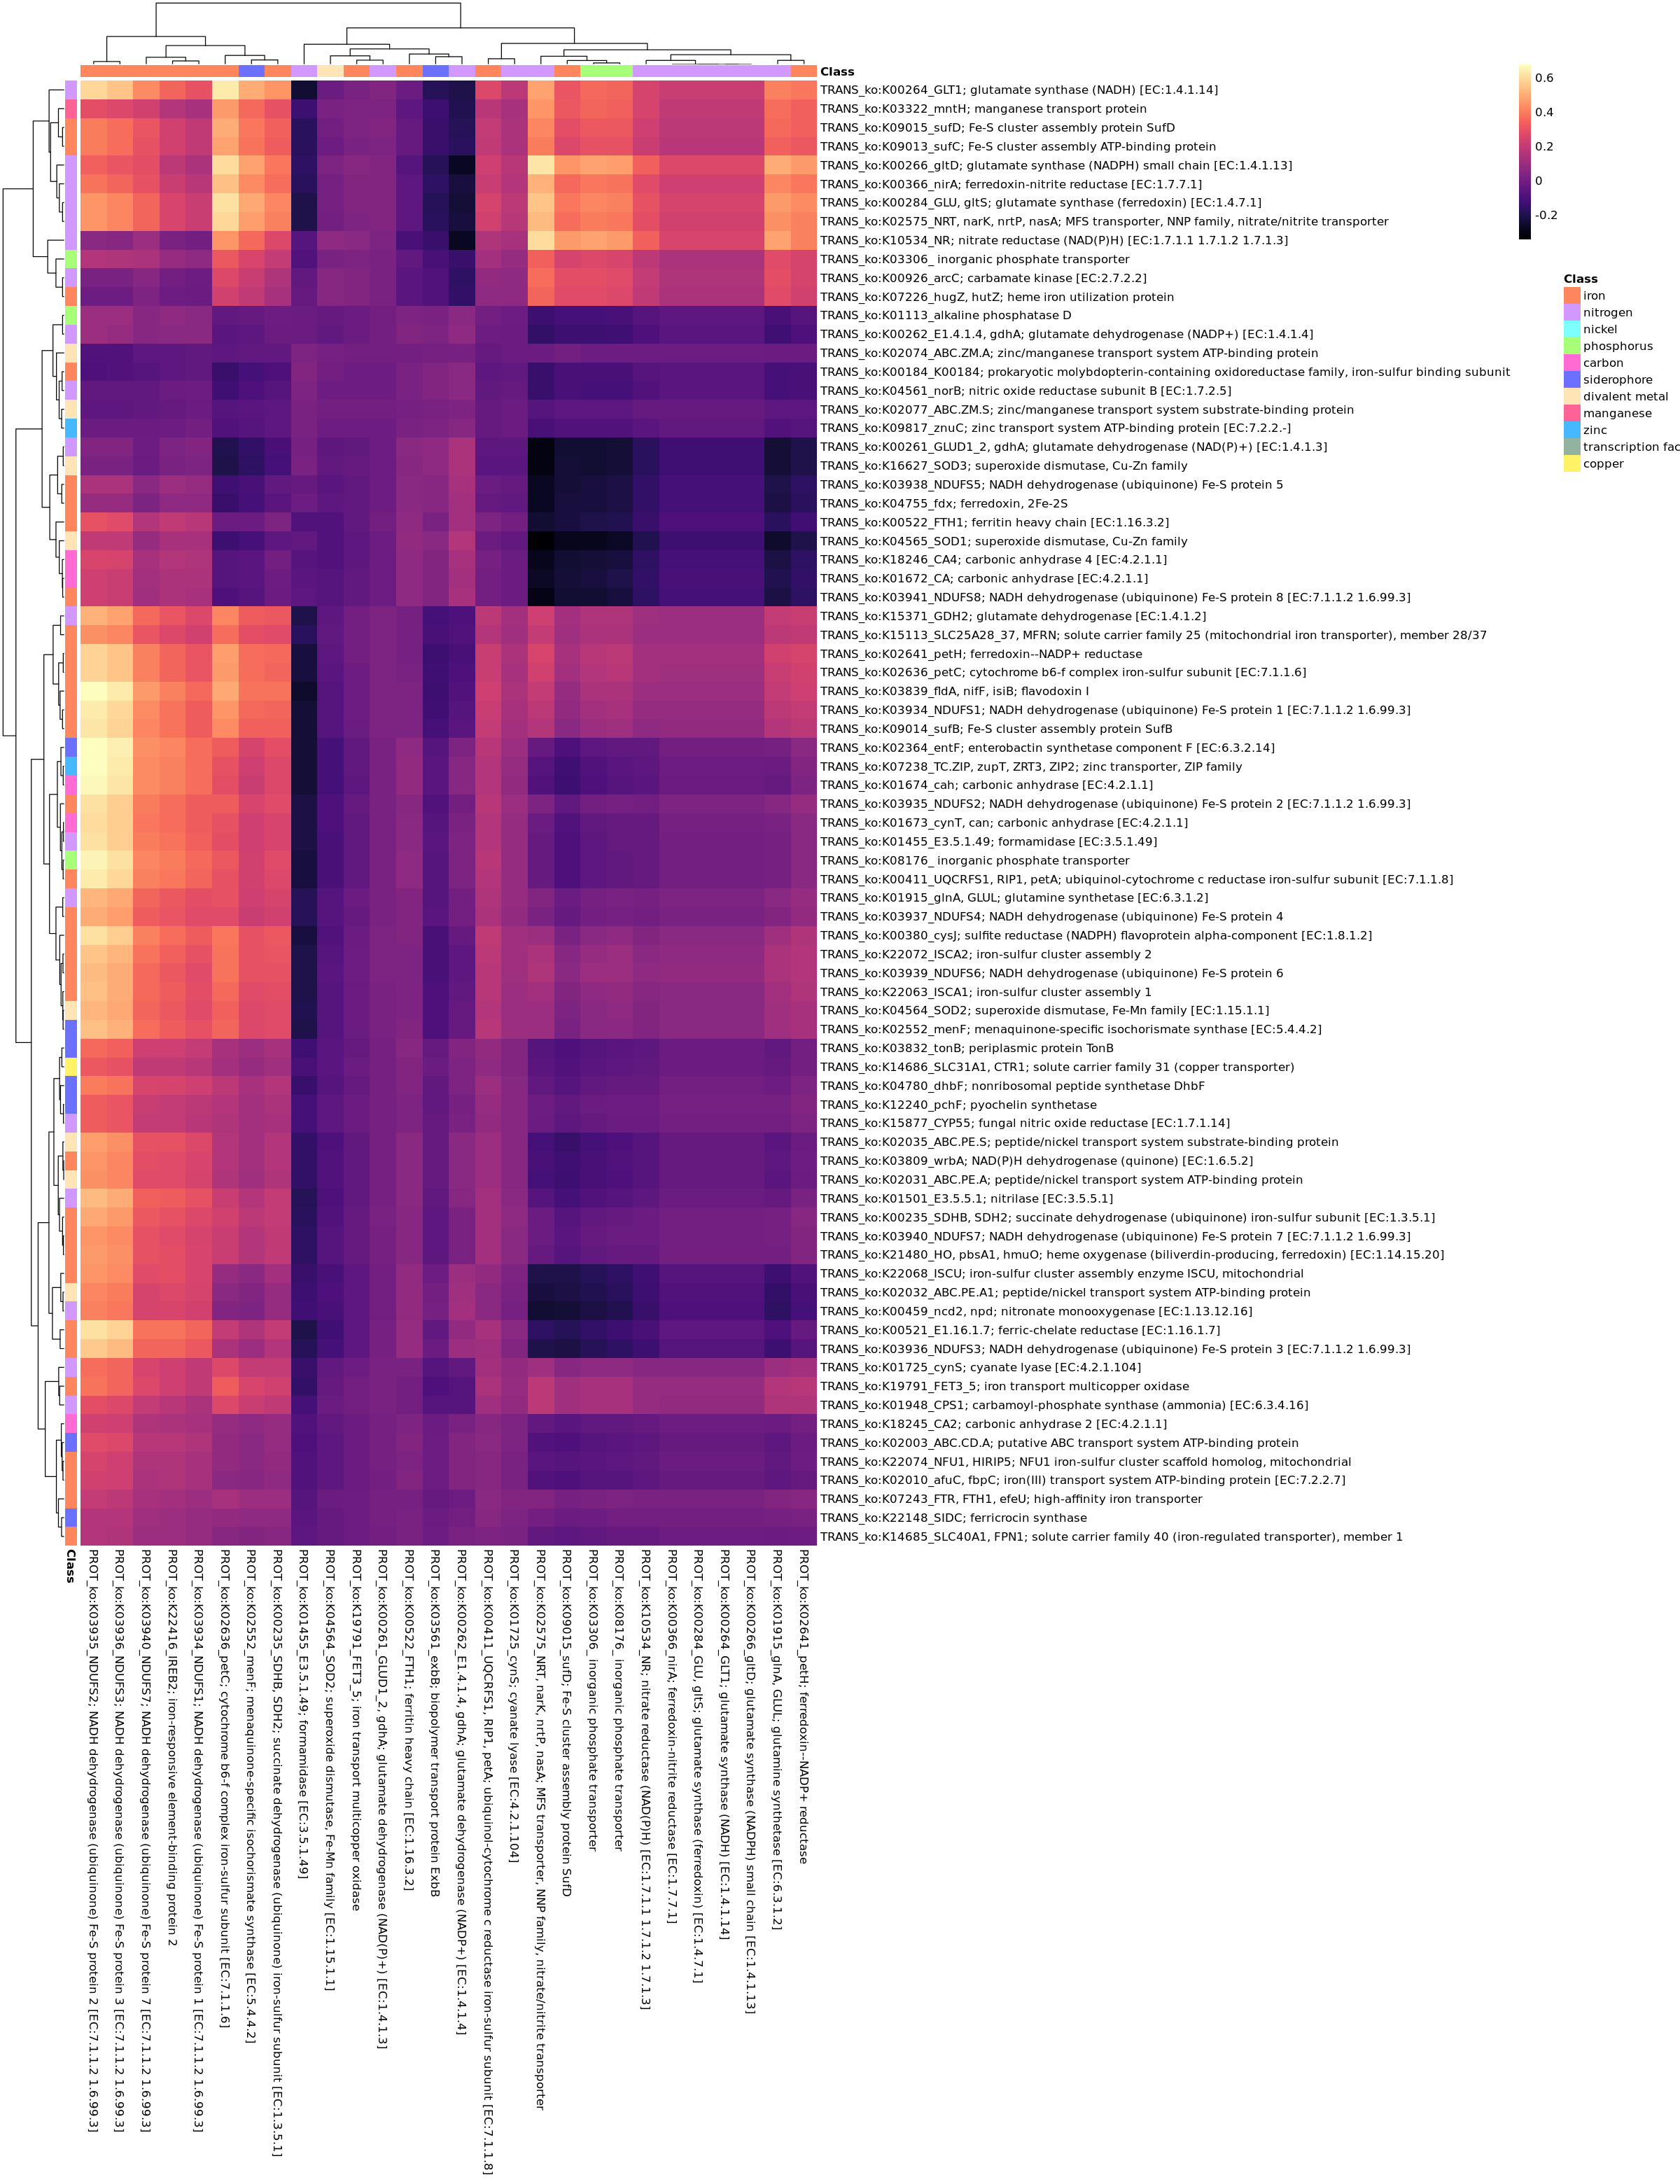

In [97]:
myColor <- viridis_pal(option = "magma")(100)
pheatmap(mat = cim, annotation_col = annotation, annotation_row = annotation.t, color = myColor, cluster_rows=T, annotation_colors = mycolors)

In [268]:
setEPS()
postscript("pls.trans.proteins.eps")
plot(rnorm(100), main="PLS.transcripts.proteins")
dev.off()

png 
  2